# Details of pre-trained models:

## MobileNet

**Pros:**
- MobileNet is designed for mobile and embedded vision applications, making it computationally efficient.
- It uses depthwise separable convolutions to reduce the number of parameters, making it well-suited for small to
moderately sized datasets.
- MobileNet is lightweight and offers a good balance between model size and accuracy.

Why it's a good fit for Fashion MNIST: Fashion MNIST is not an extremely complex dataset, and a model like MobileNet
can provide a good level of accuracy without overburdening computational resources.

# Import libraries

In [1]:
import pickle

import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets, transforms

# Prepare MobileNet model for training

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.get_device_name(0))

NVIDIA GeForce RTX 3050 Laptop GPU


In [3]:
BATCH_SIZE = 16  # Optimal batch size after running different batch sizes
NUM_OF_WORKERS = 2
NUM_OF_EPOCHS = 40
NAME_OF_MODEL = "mobile_v3_small"
EARLY_STOPPING_PATIENCE = 15

desired_size = 224
transform = transforms.Compose([transforms.Resize(desired_size),
                                transforms.Pad(padding=(desired_size - 224) // 2),
                                torchvision.transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])

trainset = datasets.FashionMNIST('data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_OF_WORKERS)
testset = datasets.FashionMNIST('data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_OF_WORKERS)

In [4]:
trainloader.dataset.data.shape

torch.Size([60000, 28, 28])

In [5]:
testloader.dataset.data.shape

torch.Size([10000, 28, 28])

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

Feature batch shape: torch.Size([16, 3, 224, 224])
Labels batch shape: torch.Size([16])


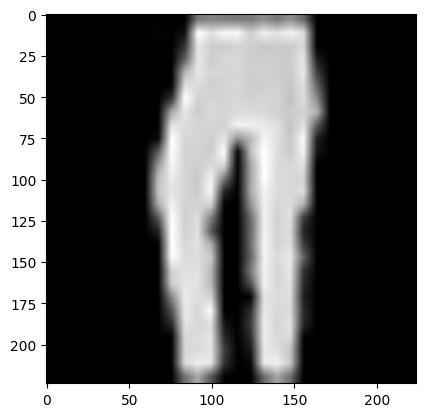

Label: 1


In [7]:
#nex iter gets next 100 images
train_features, train_labels = next(iter(trainloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[7][0].squeeze()
label = train_labels[7]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [8]:
# all_models = models.list_models()
m1 = torchvision.models.get_model("mobilenet_v3_small", num_classes=10, num_channels=1)
# Move your model to the GPU if available
m1.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [12]:
batch1, label1 = next(iter(trainloader))

Freeze only FC layer

In [14]:
# Freeze all layers
for param in m1.parameters():
    param.requires_grad = False

# Unfreeze last layer
for param in m1.classifier.parameters():
    param.requires_grad = True

## Find out optimal batch size

In [16]:
batch_sizes = [8, 16, 32, 64, 128]

from training_and_evaluate import train_and_eval

batch_tr_info, batch_te_info = train_and_eval(model=m1, trainset=trainset, testset=testset, batch_sizes=batch_sizes,
                                              NAME_OF_MODEL=NAME_OF_MODEL, folder_to_save_in="unfreeze_FC_layer",
                                              NUM_OF_EPOCHS=NUM_OF_EPOCHS,
                                              early_stopping_patience=EARLY_STOPPING_PATIENCE, NUM_OF_WORKERS=NUM_OF_WORKERS)

Epoch 1 Training...


100%|██████████| 7500/7500 [01:48<00:00, 69.16it/s]


Epoch 1 Testing...


100%|██████████| 1250/1250 [00:21<00:00, 58.69it/s]


Epoch 1: Train_accuracy: 31.23%, Train_loss: 1.886594, Test_accuracy: 38.61%, Test_loss: 1.660317
Epoch 2 Training...


100%|██████████| 7500/7500 [02:11<00:00, 57.09it/s]


Epoch 2 Testing...


100%|██████████| 1250/1250 [00:17<00:00, 71.51it/s] 


Epoch 2: Train_accuracy: 40.54%, Train_loss: 1.614865, Test_accuracy: 47.66%, Test_loss: 1.454984
Epoch 3 Training...


100%|██████████| 7500/7500 [01:46<00:00, 70.15it/s]


Epoch 3 Testing...


100%|██████████| 1250/1250 [00:19<00:00, 64.02it/s]


Epoch 3: Train_accuracy: 43.63%, Train_loss: 1.531403, Test_accuracy: 48.79%, Test_loss: 1.372404
Epoch 4 Training...


100%|██████████| 7500/7500 [01:57<00:00, 63.91it/s]


Epoch 4 Testing...


100%|██████████| 1250/1250 [00:19<00:00, 63.31it/s]


Epoch 4: Train_accuracy: 45.42%, Train_loss: 1.480120, Test_accuracy: 50.56%, Test_loss: 1.348028
Epoch 5 Training...


100%|██████████| 7500/7500 [01:45<00:00, 71.39it/s]


Epoch 5 Testing...


100%|██████████| 1250/1250 [00:15<00:00, 79.36it/s] 


Epoch 5: Train_accuracy: 46.52%, Train_loss: 1.450090, Test_accuracy: 51.21%, Test_loss: 1.335630
Epoch 6 Training...


100%|██████████| 7500/7500 [01:43<00:00, 72.60it/s]


Epoch 6 Testing...


100%|██████████| 1250/1250 [00:15<00:00, 79.84it/s] 


Epoch 6: Train_accuracy: 46.97%, Train_loss: 1.428652, Test_accuracy: 50.66%, Test_loss: 1.380519
Epoch 7 Training...


100%|██████████| 7500/7500 [01:40<00:00, 74.30it/s]


Epoch 7 Testing...


100%|██████████| 1250/1250 [00:17<00:00, 70.39it/s]


Epoch 7: Train_accuracy: 47.51%, Train_loss: 1.411913, Test_accuracy: 52.71%, Test_loss: 1.277501
Epoch 8 Training...


100%|██████████| 7500/7500 [02:09<00:00, 57.89it/s]


Epoch 8 Testing...


100%|██████████| 1250/1250 [00:20<00:00, 62.46it/s]


Epoch 8: Train_accuracy: 48.32%, Train_loss: 1.393069, Test_accuracy: 52.03%, Test_loss: 1.316230
Epoch 9 Training...


100%|██████████| 7500/7500 [02:18<00:00, 54.09it/s]


Epoch 9 Testing...


100%|██████████| 1250/1250 [00:15<00:00, 78.32it/s] 


Epoch 9: Train_accuracy: 48.41%, Train_loss: 1.382686, Test_accuracy: 54.15%, Test_loss: 1.246898
Epoch 10 Training...


100%|██████████| 7500/7500 [01:55<00:00, 65.18it/s]


Epoch 10 Testing...


100%|██████████| 1250/1250 [00:17<00:00, 70.31it/s]


Epoch 10: Train_accuracy: 48.95%, Train_loss: 1.372228, Test_accuracy: 51.62%, Test_loss: 1.308911
Epoch 11 Training...


100%|██████████| 7500/7500 [02:08<00:00, 58.48it/s]


Epoch 11 Testing...


100%|██████████| 1250/1250 [00:17<00:00, 73.38it/s]


Epoch 11: Train_accuracy: 49.11%, Train_loss: 1.366242, Test_accuracy: 55.47%, Test_loss: 1.215996
Epoch 12 Training...


100%|██████████| 7500/7500 [01:44<00:00, 71.85it/s]


Epoch 12 Testing...


100%|██████████| 1250/1250 [00:18<00:00, 67.78it/s] 


Epoch 12: Train_accuracy: 49.94%, Train_loss: 1.354090, Test_accuracy: 52.21%, Test_loss: 1.265068
Epoch 13 Training...


100%|██████████| 7500/7500 [01:55<00:00, 64.83it/s]


Epoch 13 Testing...


100%|██████████| 1250/1250 [00:22<00:00, 55.54it/s]


Epoch 13: Train_accuracy: 49.88%, Train_loss: 1.347806, Test_accuracy: 55.40%, Test_loss: 1.203195
Epoch 14 Training...


100%|██████████| 7500/7500 [01:52<00:00, 66.64it/s]


Epoch 14 Testing...


100%|██████████| 1250/1250 [00:18<00:00, 68.54it/s]


Epoch 14: Train_accuracy: 49.95%, Train_loss: 1.339957, Test_accuracy: 54.50%, Test_loss: 1.231205
Epoch 15 Training...


100%|██████████| 7500/7500 [02:01<00:00, 61.76it/s]


Epoch 15 Testing...


100%|██████████| 1250/1250 [00:19<00:00, 64.51it/s]


Epoch 15: Train_accuracy: 50.15%, Train_loss: 1.340915, Test_accuracy: 52.78%, Test_loss: 1.293357
Epoch 16 Training...


100%|██████████| 7500/7500 [02:00<00:00, 62.27it/s]


Epoch 16 Testing...


100%|██████████| 1250/1250 [00:18<00:00, 69.21it/s]


Epoch 16: Train_accuracy: 50.18%, Train_loss: 1.334072, Test_accuracy: 55.25%, Test_loss: 1.211724
Epoch 17 Training...


100%|██████████| 7500/7500 [02:03<00:00, 60.88it/s]


Epoch 17 Testing...


100%|██████████| 1250/1250 [00:18<00:00, 68.21it/s]


Epoch 17: Train_accuracy: 50.43%, Train_loss: 1.331700, Test_accuracy: 56.00%, Test_loss: 1.204374
Epoch 18 Training...


100%|██████████| 7500/7500 [01:59<00:00, 62.83it/s]


Epoch 18 Testing...


100%|██████████| 1250/1250 [00:18<00:00, 67.36it/s]


Epoch 18: Train_accuracy: 50.86%, Train_loss: 1.318983, Test_accuracy: 56.64%, Test_loss: 1.172664
Epoch 19 Training...


100%|██████████| 7500/7500 [01:59<00:00, 62.66it/s]


Epoch 19 Testing...


100%|██████████| 1250/1250 [00:18<00:00, 66.12it/s]


Epoch 19: Train_accuracy: 50.91%, Train_loss: 1.319421, Test_accuracy: 57.78%, Test_loss: 1.150327
Epoch 20 Training...


100%|██████████| 7500/7500 [02:10<00:00, 57.31it/s]


Epoch 20 Testing...


100%|██████████| 1250/1250 [00:18<00:00, 68.41it/s]


Epoch 20: Train_accuracy: 51.13%, Train_loss: 1.312223, Test_accuracy: 57.36%, Test_loss: 1.154176
Epoch 21 Training...


100%|██████████| 7500/7500 [02:03<00:00, 60.63it/s]


Epoch 21 Testing...


100%|██████████| 1250/1250 [00:19<00:00, 65.28it/s]


Epoch 21: Train_accuracy: 51.50%, Train_loss: 1.307761, Test_accuracy: 54.83%, Test_loss: 1.232517
Epoch 22 Training...


100%|██████████| 7500/7500 [01:55<00:00, 64.83it/s]


Epoch 22 Testing...


100%|██████████| 1250/1250 [00:17<00:00, 70.60it/s]


Epoch 22: Train_accuracy: 51.10%, Train_loss: 1.308787, Test_accuracy: 53.52%, Test_loss: 1.217054
Epoch 23 Training...


100%|██████████| 7500/7500 [01:46<00:00, 70.60it/s]


Epoch 23 Testing...


100%|██████████| 1250/1250 [00:18<00:00, 66.75it/s]


Epoch 23: Train_accuracy: 51.39%, Train_loss: 1.301776, Test_accuracy: 56.41%, Test_loss: 1.159752
Epoch 24 Training...


100%|██████████| 7500/7500 [01:52<00:00, 66.91it/s]


Epoch 24 Testing...


100%|██████████| 1250/1250 [00:16<00:00, 74.47it/s] 


Epoch 24: Train_accuracy: 51.55%, Train_loss: 1.296344, Test_accuracy: 55.47%, Test_loss: 1.192570
Epoch 25 Training...


100%|██████████| 7500/7500 [01:45<00:00, 70.86it/s]


Epoch 25 Testing...


100%|██████████| 1250/1250 [00:18<00:00, 67.04it/s] 


Epoch 25: Train_accuracy: 51.44%, Train_loss: 1.298729, Test_accuracy: 57.59%, Test_loss: 1.174287
Epoch 26 Training...


100%|██████████| 7500/7500 [02:10<00:00, 57.42it/s]


Epoch 26 Testing...


100%|██████████| 1250/1250 [00:21<00:00, 59.17it/s]


Epoch 26: Train_accuracy: 51.84%, Train_loss: 1.288879, Test_accuracy: 56.25%, Test_loss: 1.196953
Epoch 27 Training...


100%|██████████| 7500/7500 [02:09<00:00, 57.89it/s]


Epoch 27 Testing...


100%|██████████| 1250/1250 [00:19<00:00, 62.84it/s]


Epoch 27: Train_accuracy: 51.91%, Train_loss: 1.292012, Test_accuracy: 56.18%, Test_loss: 1.214398
Epoch 28 Training...


100%|██████████| 7500/7500 [01:57<00:00, 63.76it/s]


Epoch 28 Testing...


100%|██████████| 1250/1250 [00:18<00:00, 66.00it/s]


Epoch 28: Train_accuracy: 52.30%, Train_loss: 1.284480, Test_accuracy: 54.57%, Test_loss: 1.220414
Epoch 29 Training...


100%|██████████| 7500/7500 [02:04<00:00, 60.19it/s]


Epoch 29 Testing...


100%|██████████| 1250/1250 [00:19<00:00, 63.85it/s] 


Epoch 29: Train_accuracy: 51.92%, Train_loss: 1.285059, Test_accuracy: 56.95%, Test_loss: 1.156695
Epoch 30 Training...


100%|██████████| 7500/7500 [02:03<00:00, 60.50it/s]


Epoch 30 Testing...


100%|██████████| 1250/1250 [00:16<00:00, 76.71it/s] 


Epoch 30: Train_accuracy: 52.20%, Train_loss: 1.278621, Test_accuracy: 55.57%, Test_loss: 1.202029
Epoch 31 Training...


100%|██████████| 7500/7500 [02:08<00:00, 58.44it/s]


Epoch 31 Testing...


100%|██████████| 1250/1250 [00:23<00:00, 54.22it/s]


Epoch 31: Train_accuracy: 52.12%, Train_loss: 1.281947, Test_accuracy: 57.77%, Test_loss: 1.148565
Epoch 32 Training...


100%|██████████| 7500/7500 [02:18<00:00, 54.03it/s]


Epoch 32 Testing...


100%|██████████| 1250/1250 [00:22<00:00, 55.55it/s]


Epoch 32: Train_accuracy: 52.48%, Train_loss: 1.273648, Test_accuracy: 58.47%, Test_loss: 1.133174
Epoch 33 Training...


100%|██████████| 7500/7500 [02:08<00:00, 58.22it/s]


Epoch 33 Testing...


100%|██████████| 1250/1250 [00:20<00:00, 61.62it/s]


Epoch 33: Train_accuracy: 52.45%, Train_loss: 1.275770, Test_accuracy: 58.36%, Test_loss: 1.125781
Epoch 34 Training...


100%|██████████| 7500/7500 [02:19<00:00, 53.79it/s]


Epoch 34 Testing...


100%|██████████| 1250/1250 [00:20<00:00, 60.37it/s]


Epoch 34: Train_accuracy: 52.35%, Train_loss: 1.272453, Test_accuracy: 54.21%, Test_loss: 1.214427
Epoch 35 Training...


100%|██████████| 7500/7500 [02:04<00:00, 60.40it/s]


Epoch 35 Testing...


100%|██████████| 1250/1250 [00:17<00:00, 71.20it/s]


Epoch 35: Train_accuracy: 52.02%, Train_loss: 1.279510, Test_accuracy: 54.78%, Test_loss: 1.218285
Epoch 36 Training...


100%|██████████| 7500/7500 [02:11<00:00, 57.21it/s]


Epoch 36 Testing...


100%|██████████| 1250/1250 [00:19<00:00, 63.80it/s] 


Epoch 36: Train_accuracy: 52.36%, Train_loss: 1.274160, Test_accuracy: 55.60%, Test_loss: 1.182747
Epoch 37 Training...


100%|██████████| 7500/7500 [02:10<00:00, 57.35it/s]


Epoch 37 Testing...


100%|██████████| 1250/1250 [00:19<00:00, 63.94it/s]


Epoch 37: Train_accuracy: 52.31%, Train_loss: 1.271795, Test_accuracy: 58.67%, Test_loss: 1.127642
Epoch 38 Training...


100%|██████████| 7500/7500 [02:04<00:00, 60.43it/s]


Epoch 38 Testing...


100%|██████████| 1250/1250 [00:24<00:00, 51.03it/s]


Epoch 38: Train_accuracy: 52.50%, Train_loss: 1.270745, Test_accuracy: 55.66%, Test_loss: 1.174469
Epoch 39 Training...


100%|██████████| 7500/7500 [02:04<00:00, 60.39it/s]


Epoch 39 Testing...


100%|██████████| 1250/1250 [00:19<00:00, 64.36it/s]


Epoch 39: Train_accuracy: 52.75%, Train_loss: 1.270709, Test_accuracy: 55.45%, Test_loss: 1.193957
Epoch 40 Training...


100%|██████████| 7500/7500 [02:03<00:00, 60.58it/s]


Epoch 40 Testing...


100%|██████████| 1250/1250 [00:16<00:00, 76.28it/s] 


Epoch 40: Train_accuracy: 52.75%, Train_loss: 1.266763, Test_accuracy: 57.16%, Test_loss: 1.163858
Epoch 1 Training...


100%|██████████| 3750/3750 [01:13<00:00, 51.33it/s]


Epoch 1 Testing...


100%|██████████| 625/625 [00:12<00:00, 48.83it/s]


Epoch 1: Train_accuracy: 33.41%, Train_loss: 1.829043, Test_accuracy: 41.32%, Test_loss: 1.569524
Epoch 2 Training...


100%|██████████| 3750/3750 [01:13<00:00, 50.77it/s]


Epoch 2 Testing...


100%|██████████| 625/625 [00:12<00:00, 50.89it/s]


Epoch 2: Train_accuracy: 43.94%, Train_loss: 1.536780, Test_accuracy: 50.30%, Test_loss: 1.382949
Epoch 3 Training...


100%|██████████| 3750/3750 [01:08<00:00, 54.50it/s]


Epoch 3 Testing...


100%|██████████| 625/625 [00:11<00:00, 54.69it/s]


Epoch 3: Train_accuracy: 46.59%, Train_loss: 1.445183, Test_accuracy: 48.24%, Test_loss: 1.372127
Epoch 4 Training...


100%|██████████| 3750/3750 [01:10<00:00, 53.32it/s]


Epoch 4 Testing...


100%|██████████| 625/625 [00:12<00:00, 48.85it/s]


Epoch 4: Train_accuracy: 48.55%, Train_loss: 1.397922, Test_accuracy: 52.08%, Test_loss: 1.292723
Epoch 5 Training...


100%|██████████| 3750/3750 [01:11<00:00, 52.14it/s]


Epoch 5 Testing...


100%|██████████| 625/625 [00:11<00:00, 53.67it/s]


Epoch 5: Train_accuracy: 49.37%, Train_loss: 1.362445, Test_accuracy: 51.81%, Test_loss: 1.308004
Epoch 6 Training...


100%|██████████| 3750/3750 [01:11<00:00, 52.82it/s]


Epoch 6 Testing...


100%|██████████| 625/625 [00:11<00:00, 52.55it/s]


Epoch 6: Train_accuracy: 50.08%, Train_loss: 1.340072, Test_accuracy: 54.23%, Test_loss: 1.233786
Epoch 7 Training...


100%|██████████| 3750/3750 [01:09<00:00, 54.03it/s]


Epoch 7 Testing...


100%|██████████| 625/625 [00:11<00:00, 54.42it/s]


Epoch 7: Train_accuracy: 51.18%, Train_loss: 1.321146, Test_accuracy: 53.13%, Test_loss: 1.250988
Epoch 8 Training...


100%|██████████| 3750/3750 [01:10<00:00, 53.15it/s]


Epoch 8 Testing...


100%|██████████| 625/625 [00:12<00:00, 50.55it/s]


Epoch 8: Train_accuracy: 51.31%, Train_loss: 1.307170, Test_accuracy: 54.37%, Test_loss: 1.217329
Epoch 9 Training...


100%|██████████| 3750/3750 [01:14<00:00, 50.26it/s]


Epoch 9 Testing...


100%|██████████| 625/625 [00:12<00:00, 51.49it/s]


Epoch 9: Train_accuracy: 51.91%, Train_loss: 1.291304, Test_accuracy: 52.55%, Test_loss: 1.231685
Epoch 10 Training...


100%|██████████| 3750/3750 [01:10<00:00, 53.22it/s]


Epoch 10 Testing...


100%|██████████| 625/625 [00:12<00:00, 48.62it/s]


Epoch 10: Train_accuracy: 51.92%, Train_loss: 1.285400, Test_accuracy: 55.13%, Test_loss: 1.205063
Epoch 11 Training...


100%|██████████| 3750/3750 [01:10<00:00, 53.21it/s]


Epoch 11 Testing...


100%|██████████| 625/625 [00:12<00:00, 48.34it/s]


Epoch 11: Train_accuracy: 52.67%, Train_loss: 1.269465, Test_accuracy: 55.17%, Test_loss: 1.192092
Epoch 12 Training...


100%|██████████| 3750/3750 [01:14<00:00, 50.07it/s]


Epoch 12 Testing...


100%|██████████| 625/625 [00:15<00:00, 41.06it/s]


Epoch 12: Train_accuracy: 53.22%, Train_loss: 1.261449, Test_accuracy: 56.44%, Test_loss: 1.158976
Epoch 13 Training...


100%|██████████| 3750/3750 [01:18<00:00, 47.81it/s]


Epoch 13 Testing...


100%|██████████| 625/625 [00:12<00:00, 49.78it/s]


Epoch 13: Train_accuracy: 53.22%, Train_loss: 1.253924, Test_accuracy: 54.52%, Test_loss: 1.200794
Epoch 14 Training...


100%|██████████| 3750/3750 [01:16<00:00, 49.18it/s]


Epoch 14 Testing...


100%|██████████| 625/625 [00:12<00:00, 48.96it/s]


Epoch 14: Train_accuracy: 53.45%, Train_loss: 1.247963, Test_accuracy: 53.15%, Test_loss: 1.231849
Epoch 15 Training...


100%|██████████| 3750/3750 [01:16<00:00, 49.26it/s]


Epoch 15 Testing...


100%|██████████| 625/625 [00:13<00:00, 48.04it/s]


Epoch 15: Train_accuracy: 53.75%, Train_loss: 1.235846, Test_accuracy: 58.13%, Test_loss: 1.137586
Epoch 16 Training...


100%|██████████| 3750/3750 [01:21<00:00, 46.06it/s]


Epoch 16 Testing...


100%|██████████| 625/625 [00:14<00:00, 42.92it/s]


Epoch 16: Train_accuracy: 54.10%, Train_loss: 1.225945, Test_accuracy: 55.75%, Test_loss: 1.176307
Epoch 17 Training...


100%|██████████| 3750/3750 [01:17<00:00, 48.55it/s]


Epoch 17 Testing...


100%|██████████| 625/625 [00:14<00:00, 44.63it/s]


Epoch 17: Train_accuracy: 54.11%, Train_loss: 1.231114, Test_accuracy: 54.97%, Test_loss: 1.179493
Epoch 18 Training...


100%|██████████| 3750/3750 [01:11<00:00, 52.51it/s]


Epoch 18 Testing...


100%|██████████| 625/625 [00:12<00:00, 49.93it/s]


Epoch 18: Train_accuracy: 54.10%, Train_loss: 1.229919, Test_accuracy: 57.76%, Test_loss: 1.144792
Epoch 19 Training...


100%|██████████| 3750/3750 [01:17<00:00, 48.26it/s]


Epoch 19 Testing...


100%|██████████| 625/625 [00:13<00:00, 47.76it/s]


Epoch 19: Train_accuracy: 54.30%, Train_loss: 1.225184, Test_accuracy: 56.53%, Test_loss: 1.144010
Epoch 20 Training...


100%|██████████| 3750/3750 [01:13<00:00, 51.21it/s]


Epoch 20 Testing...


100%|██████████| 625/625 [00:12<00:00, 51.77it/s]


Epoch 20: Train_accuracy: 54.37%, Train_loss: 1.222331, Test_accuracy: 57.10%, Test_loss: 1.145800
Epoch 21 Training...


100%|██████████| 3750/3750 [01:09<00:00, 53.92it/s]


Epoch 21 Testing...


100%|██████████| 625/625 [00:12<00:00, 49.71it/s]


Epoch 21: Train_accuracy: 54.66%, Train_loss: 1.213908, Test_accuracy: 58.22%, Test_loss: 1.124231
Epoch 22 Training...


100%|██████████| 3750/3750 [01:09<00:00, 54.18it/s]


Epoch 22 Testing...


100%|██████████| 625/625 [00:11<00:00, 53.59it/s]


Epoch 22: Train_accuracy: 54.78%, Train_loss: 1.210158, Test_accuracy: 59.32%, Test_loss: 1.102689
Epoch 23 Training...


100%|██████████| 3750/3750 [01:06<00:00, 55.98it/s]


Epoch 23 Testing...


100%|██████████| 625/625 [00:14<00:00, 42.73it/s]


Epoch 23: Train_accuracy: 54.80%, Train_loss: 1.208306, Test_accuracy: 59.12%, Test_loss: 1.098350
Epoch 24 Training...


100%|██████████| 3750/3750 [01:15<00:00, 49.38it/s]


Epoch 24 Testing...


100%|██████████| 625/625 [00:13<00:00, 45.09it/s]


Epoch 24: Train_accuracy: 54.83%, Train_loss: 1.202519, Test_accuracy: 58.20%, Test_loss: 1.114917
Epoch 25 Training...


100%|██████████| 3750/3750 [01:18<00:00, 47.50it/s]


Epoch 25 Testing...


100%|██████████| 625/625 [00:13<00:00, 46.90it/s]


Epoch 25: Train_accuracy: 54.87%, Train_loss: 1.201602, Test_accuracy: 58.56%, Test_loss: 1.107787
Epoch 26 Training...


100%|██████████| 3750/3750 [01:23<00:00, 44.86it/s]


Epoch 26 Testing...


100%|██████████| 625/625 [00:15<00:00, 41.32it/s]


Epoch 26: Train_accuracy: 55.36%, Train_loss: 1.195194, Test_accuracy: 57.61%, Test_loss: 1.110093
Epoch 27 Training...


100%|██████████| 3750/3750 [01:19<00:00, 47.32it/s]


Epoch 27 Testing...


100%|██████████| 625/625 [00:13<00:00, 45.12it/s]


Epoch 27: Train_accuracy: 55.24%, Train_loss: 1.197948, Test_accuracy: 58.84%, Test_loss: 1.109928
Epoch 28 Training...


100%|██████████| 3750/3750 [01:17<00:00, 48.18it/s]


Epoch 28 Testing...


100%|██████████| 625/625 [00:15<00:00, 40.25it/s]


Epoch 28: Train_accuracy: 55.55%, Train_loss: 1.188253, Test_accuracy: 57.47%, Test_loss: 1.136338
Epoch 29 Training...


100%|██████████| 3750/3750 [01:23<00:00, 44.73it/s]


Epoch 29 Testing...


100%|██████████| 625/625 [00:13<00:00, 45.79it/s]


Epoch 29: Train_accuracy: 55.41%, Train_loss: 1.191473, Test_accuracy: 58.67%, Test_loss: 1.121262
Epoch 30 Training...


100%|██████████| 3750/3750 [01:12<00:00, 51.47it/s]


Epoch 30 Testing...


100%|██████████| 625/625 [00:13<00:00, 45.86it/s]


Epoch 30: Train_accuracy: 55.65%, Train_loss: 1.186947, Test_accuracy: 56.61%, Test_loss: 1.135836
Epoch 31 Training...


100%|██████████| 3750/3750 [01:19<00:00, 47.40it/s]


Epoch 31 Testing...


100%|██████████| 625/625 [00:14<00:00, 42.84it/s]


Epoch 31: Train_accuracy: 55.57%, Train_loss: 1.183719, Test_accuracy: 55.46%, Test_loss: 1.166891
Epoch 32 Training...


100%|██████████| 3750/3750 [01:17<00:00, 48.38it/s]


Epoch 32 Testing...


100%|██████████| 625/625 [00:12<00:00, 48.35it/s]


Epoch 32: Train_accuracy: 55.85%, Train_loss: 1.179477, Test_accuracy: 54.89%, Test_loss: 1.183467
Epoch 33 Training...


100%|██████████| 3750/3750 [01:11<00:00, 52.38it/s]


Epoch 33 Testing...


100%|██████████| 625/625 [00:12<00:00, 50.18it/s]


Epoch 33: Train_accuracy: 55.73%, Train_loss: 1.180320, Test_accuracy: 56.94%, Test_loss: 1.143761
Epoch 34 Training...


100%|██████████| 3750/3750 [01:15<00:00, 49.92it/s]


Epoch 34 Testing...


100%|██████████| 625/625 [00:14<00:00, 43.29it/s]


Epoch 34: Train_accuracy: 55.96%, Train_loss: 1.176228, Test_accuracy: 57.68%, Test_loss: 1.130830
Epoch 35 Training...


100%|██████████| 3750/3750 [01:24<00:00, 44.16it/s]


Epoch 35 Testing...


100%|██████████| 625/625 [00:16<00:00, 38.20it/s]


Epoch 35: Train_accuracy: 55.92%, Train_loss: 1.175765, Test_accuracy: 58.80%, Test_loss: 1.122148
Epoch 36 Training...


100%|██████████| 3750/3750 [01:14<00:00, 50.21it/s]


Epoch 36 Testing...


100%|██████████| 625/625 [00:13<00:00, 47.01it/s]


Epoch 36: Train_accuracy: 55.78%, Train_loss: 1.177957, Test_accuracy: 58.89%, Test_loss: 1.090070
Epoch 37 Training...


100%|██████████| 3750/3750 [01:24<00:00, 44.30it/s]


Epoch 37 Testing...


100%|██████████| 625/625 [00:17<00:00, 36.58it/s]


Epoch 37: Train_accuracy: 55.91%, Train_loss: 1.171411, Test_accuracy: 60.44%, Test_loss: 1.062281
Epoch 38 Training...


100%|██████████| 3750/3750 [01:17<00:00, 48.14it/s]


Epoch 38 Testing...


100%|██████████| 625/625 [00:12<00:00, 48.18it/s]


Epoch 38: Train_accuracy: 56.23%, Train_loss: 1.171880, Test_accuracy: 58.80%, Test_loss: 1.088875
Epoch 39 Training...


100%|██████████| 3750/3750 [01:14<00:00, 50.11it/s]


Epoch 39 Testing...


100%|██████████| 625/625 [00:12<00:00, 48.88it/s]


Epoch 39: Train_accuracy: 55.95%, Train_loss: 1.172530, Test_accuracy: 58.94%, Test_loss: 1.088543
Epoch 40 Training...


100%|██████████| 3750/3750 [01:14<00:00, 50.19it/s]


Epoch 40 Testing...


100%|██████████| 625/625 [00:12<00:00, 50.23it/s]


Epoch 40: Train_accuracy: 56.23%, Train_loss: 1.170344, Test_accuracy: 60.59%, Test_loss: 1.061134
Epoch 1 Training...


100%|██████████| 1875/1875 [00:50<00:00, 37.41it/s]


Epoch 1 Testing...


100%|██████████| 313/313 [00:10<00:00, 31.04it/s]


Epoch 1: Train_accuracy: 30.75%, Train_loss: 1.942007, Test_accuracy: 37.57%, Test_loss: 1.719172
Epoch 2 Training...


100%|██████████| 1875/1875 [00:53<00:00, 35.16it/s]


Epoch 2 Testing...


100%|██████████| 313/313 [00:11<00:00, 27.80it/s]


Epoch 2: Train_accuracy: 41.19%, Train_loss: 1.644223, Test_accuracy: 44.82%, Test_loss: 1.548232
Epoch 3 Training...


100%|██████████| 1875/1875 [00:51<00:00, 36.45it/s]


Epoch 3 Testing...


100%|██████████| 313/313 [00:10<00:00, 30.54it/s]


Epoch 3: Train_accuracy: 44.41%, Train_loss: 1.535624, Test_accuracy: 48.81%, Test_loss: 1.455367
Epoch 4 Training...


100%|██████████| 1875/1875 [00:54<00:00, 34.66it/s]


Epoch 4 Testing...


100%|██████████| 313/313 [00:11<00:00, 28.29it/s]


Epoch 4: Train_accuracy: 46.42%, Train_loss: 1.467074, Test_accuracy: 48.36%, Test_loss: 1.422069
Epoch 5 Training...


100%|██████████| 1875/1875 [00:57<00:00, 32.74it/s]


Epoch 5 Testing...


100%|██████████| 313/313 [00:10<00:00, 28.57it/s]


Epoch 5: Train_accuracy: 47.22%, Train_loss: 1.430353, Test_accuracy: 50.64%, Test_loss: 1.369529
Epoch 6 Training...


100%|██████████| 1875/1875 [00:56<00:00, 33.42it/s]


Epoch 6 Testing...


100%|██████████| 313/313 [00:10<00:00, 29.56it/s]


Epoch 6: Train_accuracy: 48.23%, Train_loss: 1.397914, Test_accuracy: 51.11%, Test_loss: 1.350139
Epoch 7 Training...


100%|██████████| 1875/1875 [00:55<00:00, 33.61it/s]


Epoch 7 Testing...


100%|██████████| 313/313 [00:10<00:00, 29.15it/s]


Epoch 7: Train_accuracy: 49.08%, Train_loss: 1.376222, Test_accuracy: 50.80%, Test_loss: 1.332051
Epoch 8 Training...


100%|██████████| 1875/1875 [00:54<00:00, 34.46it/s]


Epoch 8 Testing...


100%|██████████| 313/313 [00:10<00:00, 28.59it/s]


Epoch 8: Train_accuracy: 49.72%, Train_loss: 1.358730, Test_accuracy: 47.97%, Test_loss: 1.370138
Epoch 9 Training...


100%|██████████| 1875/1875 [00:56<00:00, 32.90it/s]


Epoch 9 Testing...


100%|██████████| 313/313 [00:10<00:00, 31.21it/s]


Epoch 9: Train_accuracy: 50.15%, Train_loss: 1.340105, Test_accuracy: 52.27%, Test_loss: 1.305816
Epoch 10 Training...


100%|██████████| 1875/1875 [00:55<00:00, 33.71it/s]


Epoch 10 Testing...


100%|██████████| 313/313 [00:11<00:00, 27.75it/s]


Epoch 10: Train_accuracy: 50.39%, Train_loss: 1.328595, Test_accuracy: 52.84%, Test_loss: 1.270216
Epoch 11 Training...


100%|██████████| 1875/1875 [00:56<00:00, 33.47it/s]


Epoch 11 Testing...


100%|██████████| 313/313 [00:11<00:00, 28.01it/s]


Epoch 11: Train_accuracy: 50.91%, Train_loss: 1.315231, Test_accuracy: 52.84%, Test_loss: 1.278919
Epoch 12 Training...


100%|██████████| 1875/1875 [00:56<00:00, 33.01it/s]


Epoch 12 Testing...


100%|██████████| 313/313 [00:10<00:00, 28.72it/s]


Epoch 12: Train_accuracy: 51.20%, Train_loss: 1.309786, Test_accuracy: 53.75%, Test_loss: 1.265261
Epoch 13 Training...


100%|██████████| 1875/1875 [00:52<00:00, 35.86it/s]


Epoch 13 Testing...


100%|██████████| 313/313 [00:11<00:00, 27.19it/s]


Epoch 13: Train_accuracy: 51.54%, Train_loss: 1.299316, Test_accuracy: 53.70%, Test_loss: 1.258996
Epoch 14 Training...


100%|██████████| 1875/1875 [00:52<00:00, 35.50it/s]


Epoch 14 Testing...


100%|██████████| 313/313 [00:10<00:00, 30.19it/s]


Epoch 14: Train_accuracy: 51.99%, Train_loss: 1.288943, Test_accuracy: 53.46%, Test_loss: 1.256670
Epoch 15 Training...


100%|██████████| 1875/1875 [00:54<00:00, 34.62it/s]


Epoch 15 Testing...


100%|██████████| 313/313 [00:11<00:00, 27.34it/s]


Epoch 15: Train_accuracy: 52.07%, Train_loss: 1.279362, Test_accuracy: 54.36%, Test_loss: 1.228062
Epoch 16 Training...


100%|██████████| 1875/1875 [00:53<00:00, 35.16it/s]


Epoch 16 Testing...


100%|██████████| 313/313 [00:10<00:00, 31.12it/s]


Epoch 16: Train_accuracy: 52.65%, Train_loss: 1.271472, Test_accuracy: 53.78%, Test_loss: 1.249069
Epoch 17 Training...


100%|██████████| 1875/1875 [00:56<00:00, 33.42it/s]


Epoch 17 Testing...


100%|██████████| 313/313 [00:12<00:00, 25.49it/s]


Epoch 17: Train_accuracy: 52.35%, Train_loss: 1.270835, Test_accuracy: 53.77%, Test_loss: 1.231005
Epoch 18 Training...


100%|██████████| 1875/1875 [00:48<00:00, 38.94it/s]


Epoch 18 Testing...


100%|██████████| 313/313 [00:09<00:00, 32.42it/s]


Epoch 18: Train_accuracy: 52.46%, Train_loss: 1.266869, Test_accuracy: 54.56%, Test_loss: 1.217491
Epoch 19 Training...


100%|██████████| 1875/1875 [00:48<00:00, 38.60it/s]


Epoch 19 Testing...


100%|██████████| 313/313 [00:09<00:00, 31.40it/s]


Epoch 19: Train_accuracy: 52.84%, Train_loss: 1.259894, Test_accuracy: 53.13%, Test_loss: 1.265668
Epoch 20 Training...


100%|██████████| 1875/1875 [00:48<00:00, 38.60it/s]


Epoch 20 Testing...


100%|██████████| 313/313 [00:10<00:00, 31.28it/s]


Epoch 20: Train_accuracy: 52.95%, Train_loss: 1.253260, Test_accuracy: 51.58%, Test_loss: 1.279679
Epoch 21 Training...


100%|██████████| 1875/1875 [00:51<00:00, 36.45it/s]


Epoch 21 Testing...


100%|██████████| 313/313 [00:10<00:00, 30.39it/s]


Epoch 21: Train_accuracy: 52.79%, Train_loss: 1.255251, Test_accuracy: 56.35%, Test_loss: 1.194587
Epoch 22 Training...


100%|██████████| 1875/1875 [00:51<00:00, 36.53it/s]


Epoch 22 Testing...


100%|██████████| 313/313 [00:10<00:00, 30.20it/s]


Epoch 22: Train_accuracy: 53.25%, Train_loss: 1.246759, Test_accuracy: 56.26%, Test_loss: 1.195492
Epoch 23 Training...


100%|██████████| 1875/1875 [00:51<00:00, 36.46it/s]


Epoch 23 Testing...


100%|██████████| 313/313 [00:10<00:00, 30.37it/s]


Epoch 23: Train_accuracy: 53.68%, Train_loss: 1.236948, Test_accuracy: 52.19%, Test_loss: 1.246523
Epoch 24 Training...


100%|██████████| 1875/1875 [00:51<00:00, 36.21it/s]


Epoch 24 Testing...


100%|██████████| 313/313 [00:10<00:00, 29.50it/s]


Epoch 24: Train_accuracy: 53.41%, Train_loss: 1.238765, Test_accuracy: 54.15%, Test_loss: 1.208109
Epoch 25 Training...


100%|██████████| 1875/1875 [00:53<00:00, 35.21it/s]


Epoch 25 Testing...


100%|██████████| 313/313 [00:10<00:00, 30.44it/s]


Epoch 25: Train_accuracy: 53.53%, Train_loss: 1.236673, Test_accuracy: 56.12%, Test_loss: 1.189622
Epoch 26 Training...


100%|██████████| 1875/1875 [00:52<00:00, 35.54it/s]


Epoch 26 Testing...


100%|██████████| 313/313 [00:10<00:00, 29.85it/s]


Epoch 26: Train_accuracy: 53.84%, Train_loss: 1.227734, Test_accuracy: 54.84%, Test_loss: 1.207783
Epoch 27 Training...


100%|██████████| 1875/1875 [00:54<00:00, 34.40it/s]


Epoch 27 Testing...


100%|██████████| 313/313 [00:10<00:00, 29.74it/s]


Epoch 27: Train_accuracy: 53.90%, Train_loss: 1.225642, Test_accuracy: 55.48%, Test_loss: 1.199876
Epoch 28 Training...


100%|██████████| 1875/1875 [00:55<00:00, 33.61it/s]


Epoch 28 Testing...


100%|██████████| 313/313 [00:12<00:00, 25.56it/s]


Epoch 28: Train_accuracy: 53.74%, Train_loss: 1.232251, Test_accuracy: 54.31%, Test_loss: 1.195890
Epoch 29 Training...


100%|██████████| 1875/1875 [00:53<00:00, 34.93it/s]


Epoch 29 Testing...


100%|██████████| 313/313 [00:10<00:00, 28.76it/s]


Epoch 29: Train_accuracy: 54.31%, Train_loss: 1.218308, Test_accuracy: 56.37%, Test_loss: 1.165783
Epoch 30 Training...


100%|██████████| 1875/1875 [00:55<00:00, 33.97it/s]


Epoch 30 Testing...


100%|██████████| 313/313 [00:10<00:00, 28.69it/s]


Epoch 30: Train_accuracy: 54.38%, Train_loss: 1.214918, Test_accuracy: 53.32%, Test_loss: 1.223892
Epoch 31 Training...


100%|██████████| 1875/1875 [00:54<00:00, 34.43it/s]


Epoch 31 Testing...


100%|██████████| 313/313 [00:11<00:00, 27.81it/s]


Epoch 31: Train_accuracy: 54.02%, Train_loss: 1.224386, Test_accuracy: 54.56%, Test_loss: 1.193923
Epoch 32 Training...


100%|██████████| 1875/1875 [00:54<00:00, 34.44it/s]


Epoch 32 Testing...


100%|██████████| 313/313 [00:10<00:00, 28.49it/s]


Epoch 32: Train_accuracy: 54.68%, Train_loss: 1.211316, Test_accuracy: 55.55%, Test_loss: 1.178218
Epoch 33 Training...


100%|██████████| 1875/1875 [00:54<00:00, 34.32it/s]


Epoch 33 Testing...


100%|██████████| 313/313 [00:11<00:00, 28.27it/s]


Epoch 33: Train_accuracy: 54.12%, Train_loss: 1.214028, Test_accuracy: 56.63%, Test_loss: 1.158999
Epoch 34 Training...


100%|██████████| 1875/1875 [00:57<00:00, 32.86it/s]


Epoch 34 Testing...


100%|██████████| 313/313 [00:10<00:00, 29.36it/s]


Epoch 34: Train_accuracy: 54.75%, Train_loss: 1.209943, Test_accuracy: 56.70%, Test_loss: 1.176804
Epoch 35 Training...


100%|██████████| 1875/1875 [00:53<00:00, 35.09it/s]


Epoch 35 Testing...


100%|██████████| 313/313 [00:11<00:00, 27.88it/s]


Epoch 35: Train_accuracy: 54.60%, Train_loss: 1.206989, Test_accuracy: 54.78%, Test_loss: 1.182411
Epoch 36 Training...


100%|██████████| 1875/1875 [00:53<00:00, 35.30it/s]


Epoch 36 Testing...


100%|██████████| 313/313 [00:11<00:00, 28.37it/s]


Epoch 36: Train_accuracy: 54.74%, Train_loss: 1.203015, Test_accuracy: 56.68%, Test_loss: 1.163058
Epoch 37 Training...


100%|██████████| 1875/1875 [00:53<00:00, 35.22it/s]


Epoch 37 Testing...


100%|██████████| 313/313 [00:10<00:00, 29.41it/s]


Epoch 37: Train_accuracy: 54.82%, Train_loss: 1.201718, Test_accuracy: 55.36%, Test_loss: 1.183610
Epoch 38 Training...


100%|██████████| 1875/1875 [00:51<00:00, 36.39it/s]


Epoch 38 Testing...


100%|██████████| 313/313 [00:11<00:00, 28.15it/s]


Epoch 38: Train_accuracy: 55.04%, Train_loss: 1.197536, Test_accuracy: 55.81%, Test_loss: 1.195762
Epoch 39 Training...


100%|██████████| 1875/1875 [00:52<00:00, 35.41it/s]


Epoch 39 Testing...


100%|██████████| 313/313 [00:09<00:00, 33.22it/s]


Epoch 39: Train_accuracy: 54.90%, Train_loss: 1.199593, Test_accuracy: 55.75%, Test_loss: 1.197826
Epoch 40 Training...


100%|██████████| 1875/1875 [00:47<00:00, 39.14it/s]


Epoch 40 Testing...


100%|██████████| 313/313 [00:10<00:00, 30.39it/s]


Epoch 40: Train_accuracy: 55.15%, Train_loss: 1.193897, Test_accuracy: 53.30%, Test_loss: 1.199074
Epoch 1 Training...


100%|██████████| 938/938 [00:50<00:00, 18.46it/s]


Epoch 1 Testing...


100%|██████████| 157/157 [00:13<00:00, 11.25it/s]


Epoch 1: Train_accuracy: 30.72%, Train_loss: 1.985144, Test_accuracy: 41.22%, Test_loss: 1.751440
Epoch 2 Training...


100%|██████████| 938/938 [01:08<00:00, 13.77it/s]


Epoch 2 Testing...


100%|██████████| 157/157 [00:13<00:00, 11.71it/s]


Epoch 2: Train_accuracy: 41.55%, Train_loss: 1.667379, Test_accuracy: 44.75%, Test_loss: 1.566500
Epoch 3 Training...


100%|██████████| 938/938 [00:49<00:00, 18.88it/s]


Epoch 3 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.28it/s]


Epoch 3: Train_accuracy: 44.92%, Train_loss: 1.539367, Test_accuracy: 44.52%, Test_loss: 1.496404
Epoch 4 Training...


100%|██████████| 938/938 [00:48<00:00, 19.35it/s]


Epoch 4 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.66it/s]


Epoch 4: Train_accuracy: 46.77%, Train_loss: 1.467239, Test_accuracy: 47.92%, Test_loss: 1.424356
Epoch 5 Training...


100%|██████████| 938/938 [00:50<00:00, 18.71it/s]


Epoch 5 Testing...


100%|██████████| 157/157 [00:10<00:00, 15.12it/s]


Epoch 5: Train_accuracy: 47.88%, Train_loss: 1.419296, Test_accuracy: 51.33%, Test_loss: 1.364831
Epoch 6 Training...


100%|██████████| 938/938 [00:46<00:00, 20.04it/s]


Epoch 6 Testing...


100%|██████████| 157/157 [00:10<00:00, 15.08it/s]


Epoch 6: Train_accuracy: 49.04%, Train_loss: 1.381005, Test_accuracy: 48.00%, Test_loss: 1.367618
Epoch 7 Training...


100%|██████████| 938/938 [00:47<00:00, 19.70it/s]


Epoch 7 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.67it/s]


Epoch 7: Train_accuracy: 49.50%, Train_loss: 1.356200, Test_accuracy: 51.55%, Test_loss: 1.333661
Epoch 8 Training...


100%|██████████| 938/938 [00:47<00:00, 19.70it/s]


Epoch 8 Testing...


100%|██████████| 157/157 [00:11<00:00, 14.12it/s]


Epoch 8: Train_accuracy: 50.20%, Train_loss: 1.337448, Test_accuracy: 49.33%, Test_loss: 1.336590
Epoch 9 Training...


100%|██████████| 938/938 [00:47<00:00, 19.56it/s]


Epoch 9 Testing...


100%|██████████| 157/157 [00:11<00:00, 14.17it/s]


Epoch 9: Train_accuracy: 50.86%, Train_loss: 1.320246, Test_accuracy: 49.34%, Test_loss: 1.318167
Epoch 10 Training...


100%|██████████| 938/938 [00:48<00:00, 19.46it/s]


Epoch 10 Testing...


100%|██████████| 157/157 [00:10<00:00, 15.39it/s]


Epoch 10: Train_accuracy: 50.93%, Train_loss: 1.307807, Test_accuracy: 52.26%, Test_loss: 1.273578
Epoch 11 Training...


100%|██████████| 938/938 [00:47<00:00, 19.66it/s]


Epoch 11 Testing...


100%|██████████| 157/157 [00:10<00:00, 15.27it/s]


Epoch 11: Train_accuracy: 51.45%, Train_loss: 1.293177, Test_accuracy: 52.20%, Test_loss: 1.281506
Epoch 12 Training...


100%|██████████| 938/938 [00:46<00:00, 19.99it/s]


Epoch 12 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.59it/s]


Epoch 12: Train_accuracy: 51.23%, Train_loss: 1.288075, Test_accuracy: 50.70%, Test_loss: 1.299150
Epoch 13 Training...


100%|██████████| 938/938 [00:48<00:00, 19.53it/s]


Epoch 13 Testing...


100%|██████████| 157/157 [00:11<00:00, 14.07it/s]


Epoch 13: Train_accuracy: 51.95%, Train_loss: 1.274331, Test_accuracy: 53.45%, Test_loss: 1.256655
Epoch 14 Training...


100%|██████████| 938/938 [00:46<00:00, 20.06it/s]


Epoch 14 Testing...


100%|██████████| 157/157 [00:09<00:00, 15.74it/s]


Epoch 14: Train_accuracy: 52.12%, Train_loss: 1.263854, Test_accuracy: 53.14%, Test_loss: 1.245930
Epoch 15 Training...


100%|██████████| 938/938 [00:45<00:00, 20.48it/s]


Epoch 15 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.90it/s]


Epoch 15: Train_accuracy: 52.80%, Train_loss: 1.253495, Test_accuracy: 53.14%, Test_loss: 1.238028
Epoch 16 Training...


100%|██████████| 938/938 [00:46<00:00, 19.96it/s]


Epoch 16 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.86it/s]


Epoch 16: Train_accuracy: 52.79%, Train_loss: 1.248052, Test_accuracy: 53.35%, Test_loss: 1.235600
Epoch 17 Training...


100%|██████████| 938/938 [00:49<00:00, 18.95it/s]


Epoch 17 Testing...


100%|██████████| 157/157 [00:11<00:00, 13.12it/s]


Epoch 17: Train_accuracy: 52.96%, Train_loss: 1.241390, Test_accuracy: 53.31%, Test_loss: 1.225981
Epoch 18 Training...


100%|██████████| 938/938 [00:50<00:00, 18.52it/s]


Epoch 18 Testing...


100%|██████████| 157/157 [00:12<00:00, 12.46it/s]


Epoch 18: Train_accuracy: 53.39%, Train_loss: 1.234307, Test_accuracy: 54.67%, Test_loss: 1.209998
Epoch 19 Training...


100%|██████████| 938/938 [00:49<00:00, 18.84it/s]


Epoch 19 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.88it/s]


Epoch 19: Train_accuracy: 53.43%, Train_loss: 1.230325, Test_accuracy: 53.25%, Test_loss: 1.241306
Epoch 20 Training...


100%|██████████| 938/938 [00:48<00:00, 19.34it/s]


Epoch 20 Testing...


100%|██████████| 157/157 [00:10<00:00, 15.00it/s]


Epoch 20: Train_accuracy: 53.52%, Train_loss: 1.223425, Test_accuracy: 53.51%, Test_loss: 1.216195
Epoch 21 Training...


100%|██████████| 938/938 [00:47<00:00, 19.84it/s]


Epoch 21 Testing...


100%|██████████| 157/157 [00:10<00:00, 15.19it/s]


Epoch 21: Train_accuracy: 53.70%, Train_loss: 1.224218, Test_accuracy: 52.44%, Test_loss: 1.223239
Epoch 22 Training...


100%|██████████| 938/938 [00:46<00:00, 20.18it/s]


Epoch 22 Testing...


100%|██████████| 157/157 [00:10<00:00, 15.00it/s]


Epoch 22: Train_accuracy: 53.78%, Train_loss: 1.217376, Test_accuracy: 54.53%, Test_loss: 1.201766
Epoch 23 Training...


100%|██████████| 938/938 [00:46<00:00, 20.03it/s]


Epoch 23 Testing...


100%|██████████| 157/157 [00:11<00:00, 14.24it/s]


Epoch 23: Train_accuracy: 54.15%, Train_loss: 1.213715, Test_accuracy: 53.22%, Test_loss: 1.224057
Epoch 24 Training...


100%|██████████| 938/938 [00:47<00:00, 19.91it/s]


Epoch 24 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.46it/s]


Epoch 24: Train_accuracy: 54.15%, Train_loss: 1.209080, Test_accuracy: 55.37%, Test_loss: 1.190873
Epoch 25 Training...


100%|██████████| 938/938 [00:48<00:00, 19.39it/s]


Epoch 25 Testing...


100%|██████████| 157/157 [00:10<00:00, 15.56it/s]


Epoch 25: Train_accuracy: 54.18%, Train_loss: 1.204622, Test_accuracy: 54.57%, Test_loss: 1.191378
Epoch 26 Training...


100%|██████████| 938/938 [00:46<00:00, 20.07it/s]


Epoch 26 Testing...


100%|██████████| 157/157 [00:10<00:00, 15.23it/s]


Epoch 26: Train_accuracy: 54.67%, Train_loss: 1.198149, Test_accuracy: 54.47%, Test_loss: 1.191618
Epoch 27 Training...


100%|██████████| 938/938 [00:46<00:00, 20.01it/s]


Epoch 27 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.57it/s]


Epoch 27: Train_accuracy: 54.38%, Train_loss: 1.197039, Test_accuracy: 56.65%, Test_loss: 1.170739
Epoch 28 Training...


100%|██████████| 938/938 [00:48<00:00, 19.52it/s]


Epoch 28 Testing...


100%|██████████| 157/157 [00:11<00:00, 14.17it/s]


Epoch 28: Train_accuracy: 54.62%, Train_loss: 1.194669, Test_accuracy: 53.79%, Test_loss: 1.204864
Epoch 29 Training...


100%|██████████| 938/938 [00:48<00:00, 19.37it/s]


Epoch 29 Testing...


100%|██████████| 157/157 [00:11<00:00, 13.91it/s]


Epoch 29: Train_accuracy: 54.94%, Train_loss: 1.190699, Test_accuracy: 55.34%, Test_loss: 1.193062
Epoch 30 Training...


100%|██████████| 938/938 [00:50<00:00, 18.57it/s]


Epoch 30 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.71it/s]


Epoch 30: Train_accuracy: 54.70%, Train_loss: 1.190787, Test_accuracy: 55.19%, Test_loss: 1.190222
Epoch 31 Training...


100%|██████████| 938/938 [00:48<00:00, 19.17it/s]


Epoch 31 Testing...


100%|██████████| 157/157 [00:11<00:00, 14.02it/s]


Epoch 31: Train_accuracy: 55.07%, Train_loss: 1.185575, Test_accuracy: 54.27%, Test_loss: 1.195654
Epoch 32 Training...


100%|██████████| 938/938 [00:50<00:00, 18.62it/s]


Epoch 32 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.74it/s]


Epoch 32: Train_accuracy: 54.89%, Train_loss: 1.187277, Test_accuracy: 55.94%, Test_loss: 1.170615
Epoch 33 Training...


100%|██████████| 938/938 [00:51<00:00, 18.35it/s]


Epoch 33 Testing...


100%|██████████| 157/157 [00:11<00:00, 14.17it/s]


Epoch 33: Train_accuracy: 55.12%, Train_loss: 1.179377, Test_accuracy: 56.60%, Test_loss: 1.157049
Epoch 34 Training...


100%|██████████| 938/938 [00:48<00:00, 19.39it/s]


Epoch 34 Testing...


100%|██████████| 157/157 [00:11<00:00, 13.92it/s]


Epoch 34: Train_accuracy: 55.49%, Train_loss: 1.178143, Test_accuracy: 56.81%, Test_loss: 1.160297
Epoch 35 Training...


100%|██████████| 938/938 [00:49<00:00, 19.14it/s]


Epoch 35 Testing...


100%|██████████| 157/157 [00:10<00:00, 15.50it/s]


Epoch 35: Train_accuracy: 55.33%, Train_loss: 1.175798, Test_accuracy: 55.21%, Test_loss: 1.172087
Epoch 36 Training...


100%|██████████| 938/938 [00:46<00:00, 20.29it/s]


Epoch 36 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.38it/s]


Epoch 36: Train_accuracy: 55.68%, Train_loss: 1.171578, Test_accuracy: 53.65%, Test_loss: 1.187272
Epoch 37 Training...


100%|██████████| 938/938 [00:47<00:00, 19.73it/s]


Epoch 37 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.32it/s]


Epoch 37: Train_accuracy: 55.27%, Train_loss: 1.173402, Test_accuracy: 56.33%, Test_loss: 1.160919
Epoch 38 Training...


100%|██████████| 938/938 [00:47<00:00, 19.65it/s]


Epoch 38 Testing...


100%|██████████| 157/157 [00:10<00:00, 15.21it/s]


Epoch 38: Train_accuracy: 55.39%, Train_loss: 1.169298, Test_accuracy: 53.99%, Test_loss: 1.198401
Epoch 39 Training...


100%|██████████| 938/938 [00:46<00:00, 20.20it/s]


Epoch 39 Testing...


100%|██████████| 157/157 [00:10<00:00, 14.74it/s]


Epoch 39: Train_accuracy: 55.56%, Train_loss: 1.167035, Test_accuracy: 57.01%, Test_loss: 1.142225
Epoch 40 Training...


100%|██████████| 938/938 [00:47<00:00, 19.86it/s]


Epoch 40 Testing...


100%|██████████| 157/157 [00:10<00:00, 15.38it/s]


Epoch 40: Train_accuracy: 55.49%, Train_loss: 1.168793, Test_accuracy: 56.91%, Test_loss: 1.146609
Epoch 1 Training...


100%|██████████| 469/469 [00:45<00:00, 10.38it/s]


Epoch 1 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.88it/s]


Epoch 1: Train_accuracy: 29.73%, Train_loss: 2.036076, Test_accuracy: 43.66%, Test_loss: 1.825354
Epoch 2 Training...


100%|██████████| 469/469 [00:45<00:00, 10.39it/s]


Epoch 2 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.58it/s]


Epoch 2: Train_accuracy: 41.27%, Train_loss: 1.752775, Test_accuracy: 46.11%, Test_loss: 1.653100
Epoch 3 Training...


100%|██████████| 469/469 [00:44<00:00, 10.49it/s]


Epoch 3 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.68it/s]


Epoch 3: Train_accuracy: 44.48%, Train_loss: 1.624946, Test_accuracy: 47.24%, Test_loss: 1.563021
Epoch 4 Training...


100%|██████████| 469/469 [00:48<00:00,  9.71it/s]


Epoch 4 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.59it/s]


Epoch 4: Train_accuracy: 46.57%, Train_loss: 1.544895, Test_accuracy: 48.96%, Test_loss: 1.497672
Epoch 5 Training...


100%|██████████| 469/469 [00:47<00:00,  9.86it/s]


Epoch 5 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.50it/s]


Epoch 5: Train_accuracy: 48.03%, Train_loss: 1.489484, Test_accuracy: 48.42%, Test_loss: 1.464987
Epoch 6 Training...


100%|██████████| 469/469 [00:48<00:00,  9.60it/s]


Epoch 6 Testing...


100%|██████████| 79/79 [00:11<00:00,  7.11it/s]


Epoch 6: Train_accuracy: 48.75%, Train_loss: 1.452775, Test_accuracy: 49.84%, Test_loss: 1.423356
Epoch 7 Training...


100%|██████████| 469/469 [00:46<00:00, 10.02it/s]


Epoch 7 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.50it/s]


Epoch 7: Train_accuracy: 50.03%, Train_loss: 1.418367, Test_accuracy: 51.31%, Test_loss: 1.390380
Epoch 8 Training...


100%|██████████| 469/469 [00:45<00:00, 10.29it/s]


Epoch 8 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.31it/s]


Epoch 8: Train_accuracy: 50.14%, Train_loss: 1.392532, Test_accuracy: 51.04%, Test_loss: 1.373028
Epoch 9 Training...


100%|██████████| 469/469 [00:50<00:00,  9.28it/s]


Epoch 9 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.50it/s]


Epoch 9: Train_accuracy: 50.99%, Train_loss: 1.371267, Test_accuracy: 50.41%, Test_loss: 1.366665
Epoch 10 Training...


100%|██████████| 469/469 [00:48<00:00,  9.69it/s]


Epoch 10 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.22it/s]


Epoch 10: Train_accuracy: 51.52%, Train_loss: 1.355026, Test_accuracy: 52.34%, Test_loss: 1.336436
Epoch 11 Training...


100%|██████████| 469/469 [00:48<00:00,  9.62it/s]


Epoch 11 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.42it/s]


Epoch 11: Train_accuracy: 51.89%, Train_loss: 1.338924, Test_accuracy: 53.37%, Test_loss: 1.310596
Epoch 12 Training...


100%|██████████| 469/469 [00:47<00:00,  9.83it/s]


Epoch 12 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.38it/s]


Epoch 12: Train_accuracy: 52.37%, Train_loss: 1.322414, Test_accuracy: 53.27%, Test_loss: 1.302509
Epoch 13 Training...


100%|██████████| 469/469 [00:48<00:00,  9.74it/s]


Epoch 13 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.62it/s]


Epoch 13: Train_accuracy: 52.89%, Train_loss: 1.311179, Test_accuracy: 53.05%, Test_loss: 1.290591
Epoch 14 Training...


100%|██████████| 469/469 [00:49<00:00,  9.52it/s]


Epoch 14 Testing...


100%|██████████| 79/79 [00:11<00:00,  6.86it/s]


Epoch 14: Train_accuracy: 53.13%, Train_loss: 1.304640, Test_accuracy: 53.99%, Test_loss: 1.288456
Epoch 15 Training...


100%|██████████| 469/469 [00:47<00:00,  9.77it/s]


Epoch 15 Testing...


100%|██████████| 79/79 [00:13<00:00,  5.85it/s]


Epoch 15: Train_accuracy: 53.29%, Train_loss: 1.290425, Test_accuracy: 52.14%, Test_loss: 1.294900
Epoch 16 Training...


100%|██████████| 469/469 [00:46<00:00, 10.07it/s]


Epoch 16 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.46it/s]


Epoch 16: Train_accuracy: 53.54%, Train_loss: 1.281916, Test_accuracy: 53.42%, Test_loss: 1.282412
Epoch 17 Training...


100%|██████████| 469/469 [00:48<00:00,  9.68it/s]


Epoch 17 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.22it/s]


Epoch 17: Train_accuracy: 53.64%, Train_loss: 1.273870, Test_accuracy: 53.18%, Test_loss: 1.275908
Epoch 18 Training...


100%|██████████| 469/469 [00:47<00:00,  9.90it/s]


Epoch 18 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.21it/s]


Epoch 18: Train_accuracy: 53.68%, Train_loss: 1.271302, Test_accuracy: 52.99%, Test_loss: 1.268106
Epoch 19 Training...


100%|██████████| 469/469 [00:48<00:00,  9.67it/s]


Epoch 19 Testing...


100%|██████████| 79/79 [00:11<00:00,  7.12it/s]


Epoch 19: Train_accuracy: 54.17%, Train_loss: 1.258174, Test_accuracy: 54.41%, Test_loss: 1.255563
Epoch 20 Training...


100%|██████████| 469/469 [00:47<00:00,  9.87it/s]


Epoch 20 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.58it/s]


Epoch 20: Train_accuracy: 54.15%, Train_loss: 1.256907, Test_accuracy: 54.51%, Test_loss: 1.246462
Epoch 21 Training...


100%|██████████| 469/469 [00:49<00:00,  9.41it/s]


Epoch 21 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.57it/s]


Epoch 21: Train_accuracy: 54.65%, Train_loss: 1.249170, Test_accuracy: 53.87%, Test_loss: 1.250064
Epoch 22 Training...


100%|██████████| 469/469 [00:49<00:00,  9.54it/s]


Epoch 22 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.21it/s]


Epoch 22: Train_accuracy: 54.74%, Train_loss: 1.240032, Test_accuracy: 54.90%, Test_loss: 1.244779
Epoch 23 Training...


100%|██████████| 469/469 [00:46<00:00, 10.08it/s]


Epoch 23 Testing...


100%|██████████| 79/79 [00:11<00:00,  7.08it/s]


Epoch 23: Train_accuracy: 54.88%, Train_loss: 1.238794, Test_accuracy: 54.97%, Test_loss: 1.224838
Epoch 24 Training...


100%|██████████| 469/469 [00:48<00:00,  9.66it/s]


Epoch 24 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.21it/s]


Epoch 24: Train_accuracy: 54.73%, Train_loss: 1.236333, Test_accuracy: 55.00%, Test_loss: 1.223445
Epoch 25 Training...


100%|██████████| 469/469 [00:48<00:00,  9.75it/s]


Epoch 25 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.37it/s]


Epoch 25: Train_accuracy: 55.11%, Train_loss: 1.228738, Test_accuracy: 54.96%, Test_loss: 1.221442
Epoch 26 Training...


100%|██████████| 469/469 [00:47<00:00,  9.95it/s]


Epoch 26 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.82it/s]


Epoch 26: Train_accuracy: 55.18%, Train_loss: 1.226143, Test_accuracy: 55.33%, Test_loss: 1.220322
Epoch 27 Training...


100%|██████████| 469/469 [00:46<00:00, 10.02it/s]


Epoch 27 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.64it/s]


Epoch 27: Train_accuracy: 55.27%, Train_loss: 1.217755, Test_accuracy: 55.06%, Test_loss: 1.224952
Epoch 28 Training...


100%|██████████| 469/469 [00:46<00:00, 10.17it/s]


Epoch 28 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.47it/s]


Epoch 28: Train_accuracy: 55.55%, Train_loss: 1.215566, Test_accuracy: 54.82%, Test_loss: 1.225137
Epoch 29 Training...


100%|██████████| 469/469 [00:49<00:00,  9.44it/s]


Epoch 29 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.82it/s]


Epoch 29: Train_accuracy: 55.58%, Train_loss: 1.215865, Test_accuracy: 55.73%, Test_loss: 1.210935
Epoch 30 Training...


100%|██████████| 469/469 [00:46<00:00,  9.99it/s]


Epoch 30 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.85it/s]


Epoch 30: Train_accuracy: 55.79%, Train_loss: 1.209762, Test_accuracy: 55.77%, Test_loss: 1.202552
Epoch 31 Training...


100%|██████████| 469/469 [00:48<00:00,  9.64it/s]


Epoch 31 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.27it/s]


Epoch 31: Train_accuracy: 55.96%, Train_loss: 1.200275, Test_accuracy: 55.51%, Test_loss: 1.204714
Epoch 32 Training...


100%|██████████| 469/469 [00:46<00:00,  9.98it/s]


Epoch 32 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.49it/s]


Epoch 32: Train_accuracy: 55.94%, Train_loss: 1.204732, Test_accuracy: 56.04%, Test_loss: 1.196542
Epoch 33 Training...


100%|██████████| 469/469 [00:56<00:00,  8.28it/s]


Epoch 33 Testing...


100%|██████████| 79/79 [00:13<00:00,  6.01it/s]


Epoch 33: Train_accuracy: 55.77%, Train_loss: 1.202641, Test_accuracy: 56.07%, Test_loss: 1.197572
Epoch 34 Training...


100%|██████████| 469/469 [00:58<00:00,  7.97it/s]


Epoch 34 Testing...


100%|██████████| 79/79 [00:12<00:00,  6.45it/s]


Epoch 34: Train_accuracy: 56.16%, Train_loss: 1.193965, Test_accuracy: 55.59%, Test_loss: 1.194939
Epoch 35 Training...


100%|██████████| 469/469 [01:01<00:00,  7.65it/s]


Epoch 35 Testing...


100%|██████████| 79/79 [00:12<00:00,  6.32it/s]


Epoch 35: Train_accuracy: 56.01%, Train_loss: 1.192574, Test_accuracy: 55.91%, Test_loss: 1.194571
Epoch 36 Training...


100%|██████████| 469/469 [00:50<00:00,  9.32it/s]


Epoch 36 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.28it/s]


Epoch 36: Train_accuracy: 56.16%, Train_loss: 1.195057, Test_accuracy: 56.11%, Test_loss: 1.195786
Epoch 37 Training...


100%|██████████| 469/469 [00:48<00:00,  9.59it/s]


Epoch 37 Testing...


100%|██████████| 79/79 [00:11<00:00,  7.03it/s]


Epoch 37: Train_accuracy: 56.27%, Train_loss: 1.192315, Test_accuracy: 56.01%, Test_loss: 1.189392
Epoch 38 Training...


100%|██████████| 469/469 [00:47<00:00,  9.88it/s]


Epoch 38 Testing...


100%|██████████| 79/79 [00:10<00:00,  7.21it/s]


Epoch 38: Train_accuracy: 56.40%, Train_loss: 1.185542, Test_accuracy: 55.36%, Test_loss: 1.200634
Epoch 39 Training...


100%|██████████| 469/469 [00:47<00:00,  9.84it/s]


Epoch 39 Testing...


100%|██████████| 79/79 [00:11<00:00,  6.85it/s]


Epoch 39: Train_accuracy: 56.47%, Train_loss: 1.181572, Test_accuracy: 56.25%, Test_loss: 1.191692
Epoch 40 Training...


100%|██████████| 469/469 [00:47<00:00,  9.97it/s]


Epoch 40 Testing...


100%|██████████| 79/79 [00:11<00:00,  6.79it/s]

Epoch 40: Train_accuracy: 56.12%, Train_loss: 1.184963, Test_accuracy: 56.16%, Test_loss: 1.205270


## Plot information

Import saved information

In [18]:
file_path = 'training_information/mobile_v3_small/unfreeze_FC_layer/batch_te_info.pkl'
with open(file_path, 'rb') as file:
    batch_te_info = pickle.load(file)
file_path = 'training_information/mobile_v3_small/unfreeze_FC_layer/batch_tr_info.pkl'
with open(file_path, 'rb') as file:
    batch_tr_info = pickle.load(file)

Plot information

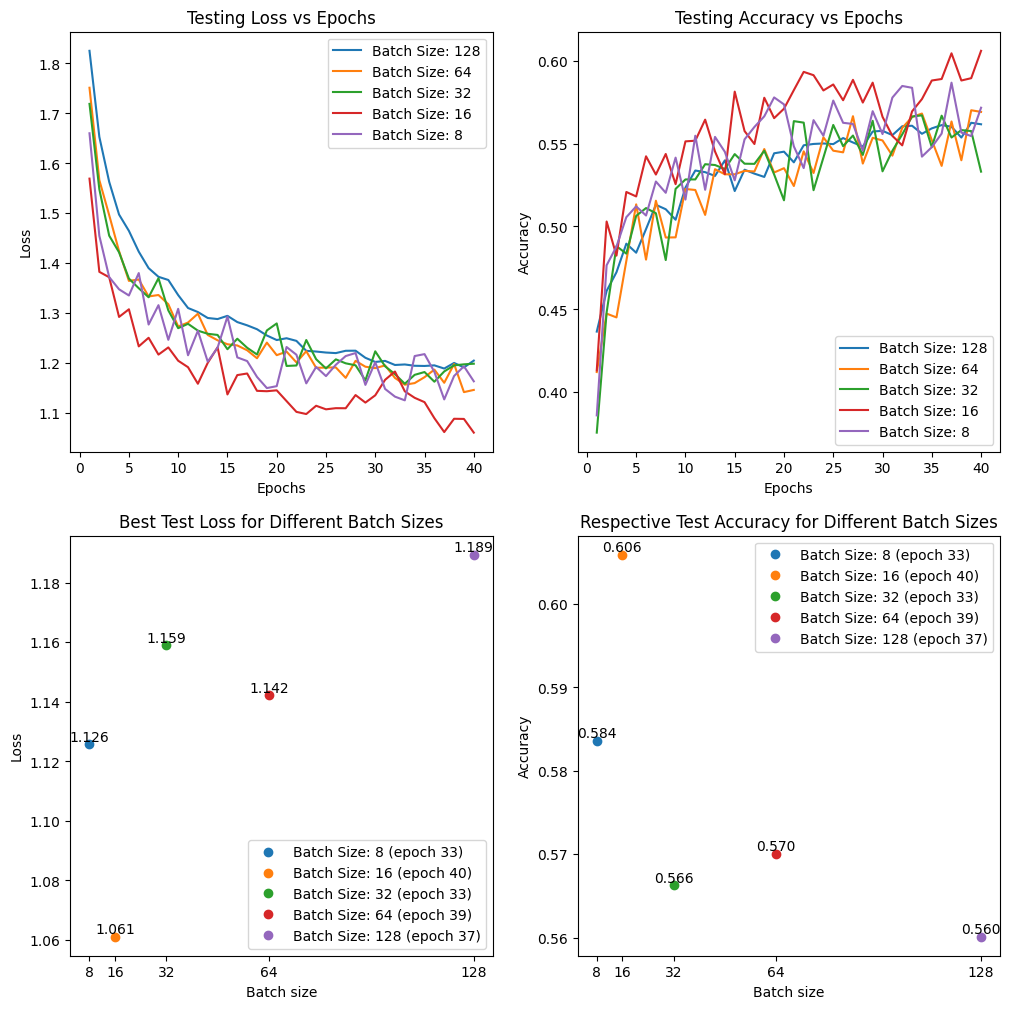

In [30]:
import matplotlib.pyplot as plt

# List of batch sizes
batch_sizes = [128, 64, 32, 16, 8]

# Plot test loss vs epoch for each batch size
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for batch_size in batch_sizes:
    # tr_loss = batch_tr_info[batch_size]["loss"]
    te_loss = batch_te_info[batch_size]["loss"]
    # axes[0, 0].plot(range(1, len(te_loss) + 1), tr_loss, label=f'Training Loss (Batch Size {batch_size})')
    axes[0, 0].plot(range(1, len(te_loss) + 1), te_loss, label=f'Batch Size: {batch_size}')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Testing Loss vs Epochs')
axes[0, 0].legend()

# Plot test acc vs epoch for each batch size
for batch_size in batch_sizes:
    # tr_acc = batch_tr_info[batch_size]["acc"]
    te_acc = batch_te_info[batch_size]["acc"]
    # axes[0, 1].plot(range(1, len(te_loss) + 1), tr_loss, label=f'Training Acc (Batch Size {batch_size})')
    axes[0, 1].plot(range(1, len(te_acc) + 1), te_acc, label=f'Batch Size: {batch_size}')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Testing Accuracy vs Epochs')
axes[0, 1].legend()


for batch_size, info in batch_te_info.items():
    best_test_loss = 100
    best_epoch = 0
    for epoch, loss in enumerate(info["loss"]):
        if best_test_loss > loss:
            best_test_loss = loss
            best_epoch = epoch
    # Third subplot: Best Test Loss
    axes[1, 0].plot(batch_size, best_test_loss, 'o', label=f'Batch Size: {batch_size} (epoch {best_epoch+1})')
    axes[1, 0].text(batch_size, best_test_loss, f'{best_test_loss:.3f}', ha='center', va='bottom')
    # Fourth subplot: Best Test Accuracy
    axes[1, 1].plot(batch_size, info["acc"][best_epoch], 'o', label=f'Batch Size: {batch_size} (epoch {best_epoch+1})')
    axes[1, 1].text(batch_size, info["acc"][best_epoch], f'{info["acc"][best_epoch]:.3f}', ha='center', va='bottom')

axes[1, 0].set_xlabel('Batch size')
axes[1, 0].set_xticks(batch_sizes)
axes[1, 0].set_ylabel('Loss')
axes[1, 0].set_title('Best Test Loss for Different Batch Sizes')
axes[1, 0].legend()

axes[1, 1].set_xlabel('Batch size')
axes[1, 1].set_xticks(batch_sizes)
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Respective Test Accuracy for Different Batch Sizes')
axes[1, 1].legend()

plt.show()

Best test loss for each batch size with it's corresponding accuracy

In [21]:
for batch_size, info in batch_te_info.items():
    best_test_loss = 100
    best_epoch = 0
    for epoch, loss in enumerate(info["loss"]):
        if best_test_loss > loss:
            best_test_loss = loss
            best_epoch = epoch
    print(f"Batch size {batch_size}: Epoch {best_epoch+1} has {round(best_test_loss, 3)} loss with {round    (info['acc'][best_epoch]*100, 2)}% accuracy")

Batch size 8: Epoch 33 has 1.126 loss with 58.36% accuracy
Batch size 16: Epoch 40 has 1.061 loss with 60.59% accuracy
Batch size 32: Epoch 33 has 1.159 loss with 56.63% accuracy
Batch size 64: Epoch 39 has 1.142 loss with 57.01% accuracy
Batch size 128: Epoch 37 has 1.189 loss with 56.01% accuracy


### Unfreeze all layers, batch 16

In [ ]:
m1 = torchvision.models.get_model("mobilenet_v3_small", num_classes=10, num_channels=1)

optimizer = torch.optim.Adam(m1.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

trainset = datasets.FashionMNIST('data/', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('data/', download=True, train=False, transform=transform)

In [18]:
batch_sizes = [16]

from training_and_evaluate import train_and_eval

batch_tr_info, batch_te_info = train_and_eval(model=m1, trainset=trainset, testset=testset, batch_sizes=batch_sizes,
                                              NAME_OF_MODEL=NAME_OF_MODEL, folder_to_save_in="unfreeze_all_layer",
                                              NUM_OF_EPOCHS=NUM_OF_EPOCHS,
                                              early_stopping_patience=EARLY_STOPPING_PATIENCE, NUM_OF_WORKERS=NUM_OF_WORKERS)

Epoch 1 Training...


100%|██████████| 3750/3750 [02:08<00:00, 29.18it/s]


Epoch 1 Testing...


100%|██████████| 625/625 [00:16<00:00, 37.31it/s]


Epoch 1: Train_accuracy: 81.19%, Train_loss: 0.513521, Test_accuracy: 87.89%, Test_loss: 0.350901
Epoch 2 Training...


100%|██████████| 3750/3750 [02:25<00:00, 25.79it/s]


Epoch 2 Testing...


100%|██████████| 625/625 [00:14<00:00, 42.95it/s]


Epoch 2: Train_accuracy: 88.91%, Train_loss: 0.311014, Test_accuracy: 87.91%, Test_loss: 0.335511
Epoch 3 Training...


100%|██████████| 3750/3750 [02:27<00:00, 25.43it/s]


Epoch 3 Testing...


100%|██████████| 625/625 [00:14<00:00, 44.01it/s]


Epoch 3: Train_accuracy: 90.79%, Train_loss: 0.262108, Test_accuracy: 90.92%, Test_loss: 0.252347
Epoch 4 Training...


100%|██████████| 3750/3750 [02:26<00:00, 25.53it/s]


Epoch 4 Testing...


100%|██████████| 625/625 [00:13<00:00, 45.97it/s]


Epoch 4: Train_accuracy: 91.59%, Train_loss: 0.233889, Test_accuracy: 90.86%, Test_loss: 0.257706
Epoch 5 Training...


100%|██████████| 3750/3750 [02:24<00:00, 25.91it/s]


Epoch 5 Testing...


100%|██████████| 625/625 [00:13<00:00, 46.24it/s]


Epoch 5: Train_accuracy: 92.37%, Train_loss: 0.211811, Test_accuracy: 91.25%, Test_loss: 0.245926
Epoch 6 Training...


100%|██████████| 3750/3750 [02:28<00:00, 25.25it/s]


Epoch 6 Testing...


100%|██████████| 625/625 [00:13<00:00, 46.76it/s]


Epoch 6: Train_accuracy: 93.05%, Train_loss: 0.192836, Test_accuracy: 92.33%, Test_loss: 0.216872
Epoch 7 Training...


100%|██████████| 3750/3750 [02:23<00:00, 26.12it/s]


Epoch 7 Testing...


100%|██████████| 625/625 [00:13<00:00, 44.76it/s]


Epoch 7: Train_accuracy: 93.60%, Train_loss: 0.177392, Test_accuracy: 92.30%, Test_loss: 0.226201
Epoch 8 Training...


100%|██████████| 3750/3750 [02:32<00:00, 24.52it/s]


Epoch 8 Testing...


100%|██████████| 625/625 [00:14<00:00, 43.59it/s]


Epoch 8: Train_accuracy: 93.99%, Train_loss: 0.164784, Test_accuracy: 92.90%, Test_loss: 0.202343
Epoch 9 Training...


100%|██████████| 3750/3750 [02:17<00:00, 27.31it/s]


Epoch 9 Testing...


100%|██████████| 625/625 [00:11<00:00, 53.80it/s]


Epoch 9: Train_accuracy: 94.62%, Train_loss: 0.151356, Test_accuracy: 92.89%, Test_loss: 0.213017
Epoch 10 Training...


100%|██████████| 3750/3750 [02:09<00:00, 28.86it/s]


Epoch 10 Testing...


100%|██████████| 625/625 [00:10<00:00, 56.83it/s]


Epoch 10: Train_accuracy: 95.05%, Train_loss: 0.136977, Test_accuracy: 92.64%, Test_loss: 0.228394
Epoch 11 Training...


100%|██████████| 3750/3750 [02:09<00:00, 28.86it/s]


Epoch 11 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.10it/s]


Epoch 11: Train_accuracy: 95.44%, Train_loss: 0.127532, Test_accuracy: 92.09%, Test_loss: 0.246655
Epoch 12 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.82it/s]


Epoch 12 Testing...


100%|██████████| 625/625 [00:11<00:00, 56.28it/s]


Epoch 12: Train_accuracy: 95.78%, Train_loss: 0.117477, Test_accuracy: 93.27%, Test_loss: 0.217052
Epoch 13 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.78it/s]


Epoch 13 Testing...


100%|██████████| 625/625 [00:11<00:00, 56.07it/s]


Epoch 13: Train_accuracy: 96.05%, Train_loss: 0.110096, Test_accuracy: 92.78%, Test_loss: 0.226594
Epoch 14 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.78it/s]


Epoch 14 Testing...


100%|██████████| 625/625 [00:11<00:00, 56.46it/s]


Epoch 14: Train_accuracy: 96.41%, Train_loss: 0.099182, Test_accuracy: 93.09%, Test_loss: 0.241634
Epoch 15 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.83it/s]


Epoch 15 Testing...


100%|██████████| 625/625 [00:11<00:00, 56.57it/s]


Epoch 15: Train_accuracy: 96.58%, Train_loss: 0.093128, Test_accuracy: 93.20%, Test_loss: 0.232019
Epoch 16 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.67it/s]


Epoch 16 Testing...


100%|██████████| 625/625 [00:11<00:00, 52.88it/s]


Epoch 16: Train_accuracy: 96.96%, Train_loss: 0.085168, Test_accuracy: 92.94%, Test_loss: 0.237201
Epoch 17 Training...


100%|██████████| 3750/3750 [02:09<00:00, 28.86it/s]


Epoch 17 Testing...


100%|██████████| 625/625 [00:11<00:00, 56.19it/s]


Epoch 17: Train_accuracy: 97.17%, Train_loss: 0.079178, Test_accuracy: 93.03%, Test_loss: 0.254630
Epoch 18 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.77it/s]


Epoch 18 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.38it/s]


Epoch 18: Train_accuracy: 97.27%, Train_loss: 0.074683, Test_accuracy: 93.12%, Test_loss: 0.257051
Epoch 19 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.64it/s]


Epoch 19 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.55it/s]


Epoch 19: Train_accuracy: 97.50%, Train_loss: 0.068952, Test_accuracy: 92.92%, Test_loss: 0.267951
Epoch 20 Training...


100%|██████████| 3750/3750 [02:11<00:00, 28.46it/s]


Epoch 20 Testing...


100%|██████████| 625/625 [00:11<00:00, 54.23it/s]


Epoch 20: Train_accuracy: 97.63%, Train_loss: 0.065854, Test_accuracy: 93.18%, Test_loss: 0.261934
Epoch 21 Training...


100%|██████████| 3750/3750 [02:11<00:00, 28.56it/s]


Epoch 21 Testing...


100%|██████████| 625/625 [00:11<00:00, 53.84it/s]


Epoch 21: Train_accuracy: 97.74%, Train_loss: 0.063089, Test_accuracy: 92.77%, Test_loss: 0.295222
Epoch 22 Training...


100%|██████████| 3750/3750 [02:11<00:00, 28.54it/s]


Epoch 22 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.29it/s]


Epoch 22: Train_accuracy: 97.89%, Train_loss: 0.058023, Test_accuracy: 93.28%, Test_loss: 0.256621
Epoch 23 Training...


100%|██████████| 3750/3750 [02:14<00:00, 27.88it/s]


Epoch 23 Testing...


100%|██████████| 625/625 [00:11<00:00, 54.35it/s]


Epoch 23: Train_accuracy: 98.13%, Train_loss: 0.054426, Test_accuracy: 93.27%, Test_loss: 0.280899
Epoch 24 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.77it/s]


Epoch 24 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.45it/s]


Epoch 24: Train_accuracy: 98.10%, Train_loss: 0.051892, Test_accuracy: 93.24%, Test_loss: 0.290914
Epoch 25 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.63it/s]


Epoch 25 Testing...


100%|██████████| 625/625 [00:11<00:00, 56.02it/s]


Epoch 25: Train_accuracy: 98.20%, Train_loss: 0.051037, Test_accuracy: 92.69%, Test_loss: 0.309367
Epoch 26 Training...


100%|██████████| 3750/3750 [02:11<00:00, 28.52it/s]


Epoch 26 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.49it/s]


Epoch 26: Train_accuracy: 98.30%, Train_loss: 0.048370, Test_accuracy: 93.44%, Test_loss: 0.282406
Epoch 27 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.80it/s]


Epoch 27 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.20it/s]


Epoch 27: Train_accuracy: 98.32%, Train_loss: 0.046967, Test_accuracy: 93.07%, Test_loss: 0.307679
Epoch 28 Training...


100%|██████████| 3750/3750 [02:11<00:00, 28.60it/s]


Epoch 28 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.63it/s]


Epoch 28: Train_accuracy: 98.49%, Train_loss: 0.043010, Test_accuracy: 92.93%, Test_loss: 0.315245
Epoch 29 Training...


100%|██████████| 3750/3750 [02:09<00:00, 28.91it/s]


Epoch 29 Testing...


100%|██████████| 625/625 [00:11<00:00, 54.99it/s]


Epoch 29: Train_accuracy: 98.52%, Train_loss: 0.043360, Test_accuracy: 93.14%, Test_loss: 0.313728
Epoch 30 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.82it/s]


Epoch 30 Testing...


100%|██████████| 625/625 [00:11<00:00, 53.80it/s]


Epoch 30: Train_accuracy: 98.56%, Train_loss: 0.040941, Test_accuracy: 93.23%, Test_loss: 0.315072
Epoch 31 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.68it/s]


Epoch 31 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.72it/s]


Epoch 31: Train_accuracy: 98.68%, Train_loss: 0.039186, Test_accuracy: 93.30%, Test_loss: 0.324911
Epoch 32 Training...


100%|██████████| 3750/3750 [02:11<00:00, 28.52it/s]


Epoch 32 Testing...


100%|██████████| 625/625 [00:11<00:00, 54.44it/s]


Epoch 32: Train_accuracy: 98.63%, Train_loss: 0.038702, Test_accuracy: 93.23%, Test_loss: 0.315010
Epoch 33 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.73it/s]


Epoch 33 Testing...


100%|██████████| 625/625 [00:11<00:00, 54.39it/s]


Epoch 33: Train_accuracy: 98.78%, Train_loss: 0.036307, Test_accuracy: 93.61%, Test_loss: 0.318006
Epoch 34 Training...


100%|██████████| 3750/3750 [02:09<00:00, 29.05it/s]


Epoch 34 Testing...


100%|██████████| 625/625 [00:11<00:00, 56.18it/s]


Epoch 34: Train_accuracy: 98.66%, Train_loss: 0.037466, Test_accuracy: 93.63%, Test_loss: 0.295735
Epoch 35 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.72it/s]


Epoch 35 Testing...


100%|██████████| 625/625 [00:11<00:00, 54.71it/s]


Epoch 35: Train_accuracy: 98.74%, Train_loss: 0.035498, Test_accuracy: 92.92%, Test_loss: 0.340507
Epoch 36 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.63it/s]


Epoch 36 Testing...


100%|██████████| 625/625 [00:12<00:00, 51.96it/s]


Epoch 36: Train_accuracy: 98.79%, Train_loss: 0.034729, Test_accuracy: 93.18%, Test_loss: 0.352542
Epoch 37 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.74it/s]


Epoch 37 Testing...


100%|██████████| 625/625 [00:13<00:00, 45.51it/s]


Epoch 37: Train_accuracy: 98.86%, Train_loss: 0.033223, Test_accuracy: 93.19%, Test_loss: 0.337364
Epoch 38 Training...


100%|██████████| 3750/3750 [02:09<00:00, 28.95it/s]


Epoch 38 Testing...


100%|██████████| 625/625 [00:11<00:00, 56.24it/s]


Epoch 38: Train_accuracy: 98.89%, Train_loss: 0.032867, Test_accuracy: 93.05%, Test_loss: 0.345144
Epoch 39 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.83it/s]


Epoch 39 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.73it/s]


Epoch 39: Train_accuracy: 98.89%, Train_loss: 0.031147, Test_accuracy: 92.92%, Test_loss: 0.377676
Epoch 40 Training...


100%|██████████| 3750/3750 [02:09<00:00, 29.06it/s]


Epoch 40 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.62it/s]


Epoch 40: Train_accuracy: 98.98%, Train_loss: 0.030650, Test_accuracy: 93.39%, Test_loss: 0.345963
Epoch 41 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.78it/s]


Epoch 41 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.65it/s]


Epoch 41: Train_accuracy: 98.97%, Train_loss: 0.029666, Test_accuracy: 93.12%, Test_loss: 0.348901
Epoch 42 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.81it/s]


Epoch 42 Testing...


100%|██████████| 625/625 [00:11<00:00, 56.04it/s]


Epoch 42: Train_accuracy: 98.95%, Train_loss: 0.030948, Test_accuracy: 93.30%, Test_loss: 0.345791
Epoch 43 Training...


100%|██████████| 3750/3750 [02:12<00:00, 28.22it/s]


Epoch 43 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.62it/s]


Epoch 43: Train_accuracy: 99.04%, Train_loss: 0.026826, Test_accuracy: 93.22%, Test_loss: 0.393086
Epoch 44 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.66it/s]


Epoch 44 Testing...


100%|██████████| 625/625 [00:11<00:00, 54.82it/s]


Epoch 44: Train_accuracy: 98.92%, Train_loss: 0.029896, Test_accuracy: 93.44%, Test_loss: 0.346198
Epoch 45 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.82it/s]


Epoch 45 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.57it/s]


Epoch 45: Train_accuracy: 99.02%, Train_loss: 0.028693, Test_accuracy: 92.80%, Test_loss: 0.354270
Epoch 46 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.70it/s]


Epoch 46 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.16it/s]


Epoch 46: Train_accuracy: 99.09%, Train_loss: 0.026618, Test_accuracy: 92.98%, Test_loss: 0.357080
Epoch 47 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.65it/s]


Epoch 47 Testing...


100%|██████████| 625/625 [00:11<00:00, 56.81it/s]


Epoch 47: Train_accuracy: 99.05%, Train_loss: 0.027267, Test_accuracy: 93.51%, Test_loss: 0.357896
Epoch 48 Training...


100%|██████████| 3750/3750 [02:10<00:00, 28.74it/s]


Epoch 48 Testing...


100%|██████████| 625/625 [00:11<00:00, 56.37it/s]

Epoch 48: Train_accuracy: 99.09%, Train_loss: 0.026881, Test_accuracy: 92.98%, Test_loss: 0.364862
Early stopping triggered. No improvement for 40 epochs.


## Plot information

Import saved information

In [14]:
file_path = 'training_information/mobile_v3_small/unfreeze_all_layer/batch_te_info.pkl'
with open(file_path, 'rb') as file:
    batch_te_info = pickle.load(file)
file_path = 'training_information/mobile_v3_small/unfreeze_all_layer/batch_tr_info.pkl'
with open(file_path, 'rb') as file:
    batch_tr_info = pickle.load(file)

Plot information

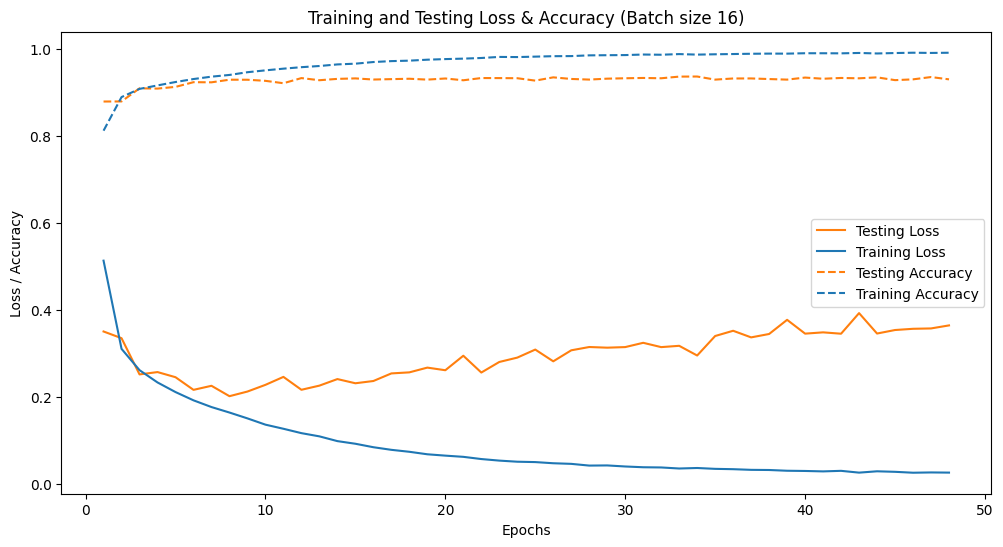

In [15]:
import matplotlib.pyplot as plt
# Specify the batch size you want to display
batch_size_to_display = 16

# Get the data for the specified batch size
te_loss = batch_te_info[batch_size_to_display]["loss"]
te_acc = batch_te_info[batch_size_to_display]["acc"]
tr_loss = batch_tr_info[batch_size_to_display]["loss"]
tr_acc = batch_tr_info[batch_size_to_display]["acc"]

# Create a single plot with combined training and testing information
plt.figure(figsize=(12, 6))

orange = 'tab:orange'  # Shades of orange
blue = 'tab:blue'  # An opposing color to orange

# Plot testing loss (shades of orange)
plt.plot(range(1, len(te_loss) + 1), te_loss, label=f'Testing Loss', color=orange)

# Plot training loss (shades of orange, different linestyle)
plt.plot(range(1, len(te_loss) + 1), tr_loss, label=f'Training Loss', color=blue)

# Plot testing accuracy (shades of an opposing color)
plt.plot(range(1, len(te_loss) + 1), te_acc, label=f'Testing Accuracy', linestyle='--', color=orange)

# Plot training accuracy (shades of an opposing color, different linestyle)
plt.plot(range(1, len(te_loss) + 1), tr_acc, label=f'Training Accuracy', linestyle='--', color=blue)

plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.title('Training and Testing Loss & Accuracy (Batch size 16)')
plt.legend()

plt.show()

Best test loss for each batch size with it's corresponding accuracy

In [17]:
for batch_size, info in batch_te_info.items():
    best_test_loss = 100
    best_epoch = 0
    for epoch, loss in enumerate(info["loss"]):
        if best_test_loss > loss:
            best_test_loss = loss
            best_epoch = epoch
    print(f"Batch size {batch_size}: Epoch {best_epoch+1} has {round(best_test_loss, 3)} loss with {round    (info['acc'][best_epoch]*100, 2)}% accuracy")

Batch size 16: Epoch 8 has 0.202 loss with 92.9% accuracy


# CutMix

In [4]:
m1 = torchvision.models.get_model("mobilenet_v3_small", num_classes=10)

optimizer = torch.optim.Adam(m1.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

early_stopping_patience = 15
NUM_OF_EPOCHS = 100
BATCH_SIZE = 16

In [5]:
batch_sizes = [BATCH_SIZE]

from training_and_evaluate import train_and_eval

batch_tr_info, batch_te_info = train_and_eval(model=m1, trainset=trainset, testset=testset, batch_sizes=batch_sizes,
                                              NAME_OF_MODEL=NAME_OF_MODEL, folder_to_save_in="cutmix",
                                              NUM_OF_EPOCHS=NUM_OF_EPOCHS,
                                              early_stopping_patience=EARLY_STOPPING_PATIENCE,
                                              NUM_OF_WORKERS=NUM_OF_WORKERS, cutmix=True)

Device: cuda:0
Epoch 1 Training...


100%|██████████| 3750/3750 [04:38<00:00, 13.46it/s]


Epoch 1 Testing...


100%|██████████| 625/625 [00:19<00:00, 32.35it/s]


Epoch 1: Train_accuracy: 67.20%, Train_loss: 1.250252, Test_accuracy: 87.38%, Test_loss: 0.415072
Epoch 2 Training...


100%|██████████| 3750/3750 [04:35<00:00, 13.61it/s]


Epoch 2 Testing...


100%|██████████| 625/625 [00:19<00:00, 32.21it/s]


Epoch 2: Train_accuracy: 74.99%, Train_loss: 1.026412, Test_accuracy: 90.63%, Test_loss: 0.317449
Epoch 3 Training...


100%|██████████| 3750/3750 [04:36<00:00, 13.56it/s]


Epoch 3 Testing...


100%|██████████| 625/625 [00:20<00:00, 29.87it/s]


Epoch 3: Train_accuracy: 76.72%, Train_loss: 0.961874, Test_accuracy: 89.94%, Test_loss: 0.327477
Epoch 4 Training...


100%|██████████| 3750/3750 [04:41<00:00, 13.34it/s]


Epoch 4 Testing...


100%|██████████| 625/625 [00:19<00:00, 32.14it/s]


Epoch 4: Train_accuracy: 77.76%, Train_loss: 0.930598, Test_accuracy: 91.89%, Test_loss: 0.291377
Epoch 5 Training...


100%|██████████| 3750/3750 [04:37<00:00, 13.54it/s]


Epoch 5 Testing...


100%|██████████| 625/625 [00:20<00:00, 31.09it/s]


Epoch 5: Train_accuracy: 78.56%, Train_loss: 0.908571, Test_accuracy: 91.41%, Test_loss: 0.315806
Epoch 6 Training...


100%|██████████| 3750/3750 [04:40<00:00, 13.37it/s]


Epoch 6 Testing...


100%|██████████| 625/625 [00:19<00:00, 31.29it/s]


Epoch 6: Train_accuracy: 79.16%, Train_loss: 0.885222, Test_accuracy: 91.88%, Test_loss: 0.289306
Epoch 7 Training...


100%|██████████| 3750/3750 [04:39<00:00, 13.43it/s]


Epoch 7 Testing...


100%|██████████| 625/625 [00:21<00:00, 29.61it/s]


Epoch 7: Train_accuracy: 79.27%, Train_loss: 0.867461, Test_accuracy: 91.80%, Test_loss: 0.292309
Epoch 8 Training...


100%|██████████| 3750/3750 [04:40<00:00, 13.39it/s]


Epoch 8 Testing...


100%|██████████| 625/625 [00:19<00:00, 32.70it/s]


Epoch 8: Train_accuracy: 79.94%, Train_loss: 0.851116, Test_accuracy: 89.99%, Test_loss: 0.320501
Epoch 9 Training...


100%|██████████| 3750/3750 [04:38<00:00, 13.45it/s]


Epoch 9 Testing...


100%|██████████| 625/625 [00:19<00:00, 31.95it/s]


Epoch 9: Train_accuracy: 80.35%, Train_loss: 0.843624, Test_accuracy: 91.25%, Test_loss: 0.281782
Epoch 10 Training...


100%|██████████| 3750/3750 [04:39<00:00, 13.42it/s]


Epoch 10 Testing...


100%|██████████| 625/625 [00:19<00:00, 31.92it/s]


Epoch 10: Train_accuracy: 80.16%, Train_loss: 0.833520, Test_accuracy: 93.19%, Test_loss: 0.261287
Epoch 11 Training...


100%|██████████| 3750/3750 [04:44<00:00, 13.19it/s]


Epoch 11 Testing...


100%|██████████| 625/625 [00:20<00:00, 30.57it/s]


Epoch 11: Train_accuracy: 80.84%, Train_loss: 0.827133, Test_accuracy: 91.98%, Test_loss: 0.281786
Epoch 12 Training...


100%|██████████| 3750/3750 [04:41<00:00, 13.34it/s]


Epoch 12 Testing...


100%|██████████| 625/625 [00:19<00:00, 31.30it/s]


Epoch 12: Train_accuracy: 81.42%, Train_loss: 0.815362, Test_accuracy: 93.03%, Test_loss: 0.258428
Epoch 13 Training...


100%|██████████| 3750/3750 [04:36<00:00, 13.56it/s]


Epoch 13 Testing...


100%|██████████| 625/625 [00:20<00:00, 31.10it/s]


Epoch 13: Train_accuracy: 81.16%, Train_loss: 0.812976, Test_accuracy: 92.07%, Test_loss: 0.285952
Epoch 14 Training...


100%|██████████| 3750/3750 [04:38<00:00, 13.47it/s]


Epoch 14 Testing...


100%|██████████| 625/625 [00:20<00:00, 31.18it/s]


Epoch 14: Train_accuracy: 81.09%, Train_loss: 0.803264, Test_accuracy: 93.22%, Test_loss: 0.273594
Epoch 15 Training...


100%|██████████| 3750/3750 [04:46<00:00, 13.09it/s]


Epoch 15 Testing...


100%|██████████| 625/625 [00:20<00:00, 31.15it/s]


Epoch 15: Train_accuracy: 81.85%, Train_loss: 0.793939, Test_accuracy: 93.29%, Test_loss: 0.262141
Epoch 16 Training...


100%|██████████| 3750/3750 [04:43<00:00, 13.24it/s]


Epoch 16 Testing...


100%|██████████| 625/625 [00:19<00:00, 31.86it/s]


Epoch 16: Train_accuracy: 81.55%, Train_loss: 0.795316, Test_accuracy: 93.31%, Test_loss: 0.256478
Epoch 17 Training...


100%|██████████| 3750/3750 [04:36<00:00, 13.58it/s]


Epoch 17 Testing...


100%|██████████| 625/625 [00:20<00:00, 30.49it/s]


Epoch 17: Train_accuracy: 82.03%, Train_loss: 0.780948, Test_accuracy: 93.39%, Test_loss: 0.266645
Epoch 18 Training...


100%|██████████| 3750/3750 [04:39<00:00, 13.41it/s]


Epoch 18 Testing...


100%|██████████| 625/625 [00:20<00:00, 30.79it/s]


Epoch 18: Train_accuracy: 81.75%, Train_loss: 0.785079, Test_accuracy: 93.86%, Test_loss: 0.235493
Epoch 19 Training...


100%|██████████| 3750/3750 [04:46<00:00, 13.09it/s]


Epoch 19 Testing...


100%|██████████| 625/625 [00:20<00:00, 31.21it/s]


Epoch 19: Train_accuracy: 82.73%, Train_loss: 0.767745, Test_accuracy: 93.50%, Test_loss: 0.267819
Epoch 20 Training...


100%|██████████| 3750/3750 [04:45<00:00, 13.14it/s]


Epoch 20 Testing...


100%|██████████| 625/625 [00:19<00:00, 31.98it/s]


Epoch 20: Train_accuracy: 83.32%, Train_loss: 0.766131, Test_accuracy: 93.72%, Test_loss: 0.248855
Epoch 21 Training...


100%|██████████| 3750/3750 [04:35<00:00, 13.61it/s]


Epoch 21 Testing...


100%|██████████| 625/625 [00:19<00:00, 31.45it/s]


Epoch 21: Train_accuracy: 82.49%, Train_loss: 0.770216, Test_accuracy: 93.79%, Test_loss: 0.247217
Epoch 22 Training...


100%|██████████| 3750/3750 [04:42<00:00, 13.25it/s]


Epoch 22 Testing...


100%|██████████| 625/625 [00:19<00:00, 32.32it/s]


Epoch 22: Train_accuracy: 82.63%, Train_loss: 0.762037, Test_accuracy: 93.62%, Test_loss: 0.245633
Epoch 23 Training...


100%|██████████| 3750/3750 [04:39<00:00, 13.40it/s]


Epoch 23 Testing...


100%|██████████| 625/625 [00:19<00:00, 32.44it/s]


Epoch 23: Train_accuracy: 82.98%, Train_loss: 0.759606, Test_accuracy: 93.55%, Test_loss: 0.238715
Epoch 24 Training...


100%|██████████| 3750/3750 [04:38<00:00, 13.48it/s]


Epoch 24 Testing...


100%|██████████| 625/625 [00:20<00:00, 30.48it/s]


Epoch 24: Train_accuracy: 83.30%, Train_loss: 0.753925, Test_accuracy: 93.60%, Test_loss: 0.260010
Epoch 25 Training...


100%|██████████| 3750/3750 [04:40<00:00, 13.39it/s]


Epoch 25 Testing...


100%|██████████| 625/625 [00:17<00:00, 35.18it/s]


Epoch 25: Train_accuracy: 83.13%, Train_loss: 0.751142, Test_accuracy: 93.51%, Test_loss: 0.242548
Epoch 26 Training...


100%|██████████| 3750/3750 [04:57<00:00, 12.60it/s]


Epoch 26 Testing...


100%|██████████| 625/625 [00:20<00:00, 29.80it/s]


Epoch 26: Train_accuracy: 83.62%, Train_loss: 0.750772, Test_accuracy: 94.12%, Test_loss: 0.221375
Epoch 27 Training...


100%|██████████| 3750/3750 [04:49<00:00, 12.94it/s]


Epoch 27 Testing...


100%|██████████| 625/625 [00:25<00:00, 24.62it/s]


Epoch 27: Train_accuracy: 83.36%, Train_loss: 0.748982, Test_accuracy: 93.64%, Test_loss: 0.230503
Epoch 28 Training...


100%|██████████| 3750/3750 [04:39<00:00, 13.40it/s]


Epoch 28 Testing...


100%|██████████| 625/625 [00:22<00:00, 27.63it/s]


Epoch 28: Train_accuracy: 83.58%, Train_loss: 0.745388, Test_accuracy: 93.52%, Test_loss: 0.257063
Epoch 29 Training...


100%|██████████| 3750/3750 [04:39<00:00, 13.39it/s]


Epoch 29 Testing...


100%|██████████| 625/625 [00:21<00:00, 28.96it/s]


Epoch 29: Train_accuracy: 83.49%, Train_loss: 0.744612, Test_accuracy: 94.28%, Test_loss: 0.242717
Epoch 30 Training...


100%|██████████| 3750/3750 [04:39<00:00, 13.40it/s]


Epoch 30 Testing...


100%|██████████| 625/625 [00:22<00:00, 28.03it/s]


Epoch 30: Train_accuracy: 84.17%, Train_loss: 0.733922, Test_accuracy: 93.97%, Test_loss: 0.236780
Epoch 31 Training...


100%|██████████| 3750/3750 [04:39<00:00, 13.40it/s]


Epoch 31 Testing...


100%|██████████| 625/625 [00:19<00:00, 32.74it/s]


Epoch 31: Train_accuracy: 83.47%, Train_loss: 0.738514, Test_accuracy: 93.78%, Test_loss: 0.232982
Epoch 32 Training...


100%|██████████| 3750/3750 [04:47<00:00, 13.04it/s]


Epoch 32 Testing...


100%|██████████| 625/625 [00:19<00:00, 32.48it/s]


Epoch 32: Train_accuracy: 84.13%, Train_loss: 0.734237, Test_accuracy: 94.33%, Test_loss: 0.229793
Epoch 33 Training...


100%|██████████| 3750/3750 [04:42<00:00, 13.26it/s]


Epoch 33 Testing...


100%|██████████| 625/625 [00:15<00:00, 39.27it/s]


Epoch 33: Train_accuracy: 83.59%, Train_loss: 0.734019, Test_accuracy: 94.06%, Test_loss: 0.227353
Epoch 34 Training...


100%|██████████| 3750/3750 [04:48<00:00, 13.01it/s]


Epoch 34 Testing...


100%|██████████| 625/625 [00:18<00:00, 33.78it/s]


Epoch 34: Train_accuracy: 84.26%, Train_loss: 0.732343, Test_accuracy: 94.19%, Test_loss: 0.215917
Epoch 35 Training...


100%|██████████| 3750/3750 [04:41<00:00, 13.30it/s]


Epoch 35 Testing...


100%|██████████| 625/625 [00:18<00:00, 34.09it/s]


Epoch 35: Train_accuracy: 84.51%, Train_loss: 0.722888, Test_accuracy: 93.70%, Test_loss: 0.232957
Epoch 36 Training...


100%|██████████| 3750/3750 [04:37<00:00, 13.51it/s]


Epoch 36 Testing...


100%|██████████| 625/625 [00:18<00:00, 33.89it/s]


Epoch 36: Train_accuracy: 84.16%, Train_loss: 0.729912, Test_accuracy: 92.37%, Test_loss: 0.251316
Epoch 37 Training...


100%|██████████| 3750/3750 [04:42<00:00, 13.28it/s]


Epoch 37 Testing...


100%|██████████| 625/625 [00:18<00:00, 33.72it/s]


Epoch 37: Train_accuracy: 84.69%, Train_loss: 0.720948, Test_accuracy: 93.20%, Test_loss: 0.257686
Epoch 38 Training...


100%|██████████| 3750/3750 [04:42<00:00, 13.27it/s]


Epoch 38 Testing...


100%|██████████| 625/625 [00:18<00:00, 33.64it/s]


Epoch 38: Train_accuracy: 84.94%, Train_loss: 0.715617, Test_accuracy: 92.80%, Test_loss: 0.290237
Epoch 39 Training...


100%|██████████| 3750/3750 [04:35<00:00, 13.60it/s]


Epoch 39 Testing...


100%|██████████| 625/625 [00:18<00:00, 34.37it/s]


Epoch 39: Train_accuracy: 84.86%, Train_loss: 0.713141, Test_accuracy: 93.21%, Test_loss: 0.296034
Epoch 40 Training...


100%|██████████| 3750/3750 [04:08<00:00, 15.07it/s]


Epoch 40 Testing...


100%|██████████| 625/625 [00:13<00:00, 46.81it/s]


Epoch 40: Train_accuracy: 84.72%, Train_loss: 0.713335, Test_accuracy: 93.79%, Test_loss: 0.237893
Epoch 41 Training...


100%|██████████| 3750/3750 [02:24<00:00, 25.97it/s]


Epoch 41 Testing...


100%|██████████| 625/625 [00:11<00:00, 52.63it/s]


Epoch 41: Train_accuracy: 84.75%, Train_loss: 0.714943, Test_accuracy: 94.39%, Test_loss: 0.236558
Epoch 42 Training...


100%|██████████| 3750/3750 [02:19<00:00, 26.89it/s]


Epoch 42 Testing...


100%|██████████| 625/625 [00:12<00:00, 51.30it/s]


Epoch 42: Train_accuracy: 85.22%, Train_loss: 0.712772, Test_accuracy: 93.45%, Test_loss: 0.226441
Epoch 43 Training...


100%|██████████| 3750/3750 [02:13<00:00, 28.06it/s]


Epoch 43 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.53it/s]


Epoch 43: Train_accuracy: 85.41%, Train_loss: 0.708364, Test_accuracy: 92.96%, Test_loss: 0.250245
Epoch 44 Training...


100%|██████████| 3750/3750 [02:14<00:00, 27.96it/s]


Epoch 44 Testing...


100%|██████████| 625/625 [00:11<00:00, 53.53it/s]


Epoch 44: Train_accuracy: 85.36%, Train_loss: 0.706795, Test_accuracy: 94.30%, Test_loss: 0.229036
Epoch 45 Training...


100%|██████████| 3750/3750 [02:12<00:00, 28.25it/s]


Epoch 45 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.72it/s]


Epoch 45: Train_accuracy: 85.36%, Train_loss: 0.700963, Test_accuracy: 93.92%, Test_loss: 0.236518
Epoch 46 Training...


100%|██████████| 3750/3750 [02:12<00:00, 28.21it/s]


Epoch 46 Testing...


100%|██████████| 625/625 [00:11<00:00, 55.01it/s]


Epoch 46: Train_accuracy: 85.64%, Train_loss: 0.701951, Test_accuracy: 94.12%, Test_loss: 0.237292
Epoch 47 Training...


100%|██████████| 3750/3750 [02:12<00:00, 28.26it/s]


Epoch 47 Testing...


100%|██████████| 625/625 [00:11<00:00, 54.87it/s]


Epoch 47: Train_accuracy: 85.18%, Train_loss: 0.704179, Test_accuracy: 93.19%, Test_loss: 0.243406
Epoch 48 Training...


100%|██████████| 3750/3750 [02:12<00:00, 28.32it/s]


Epoch 48 Testing...


100%|██████████| 625/625 [00:11<00:00, 54.84it/s]


Epoch 48: Train_accuracy: 85.54%, Train_loss: 0.701287, Test_accuracy: 94.09%, Test_loss: 0.241178
Epoch 49 Training...


100%|██████████| 3750/3750 [02:13<00:00, 28.18it/s]


Epoch 49 Testing...


100%|██████████| 625/625 [00:11<00:00, 54.76it/s]

Epoch 49: Train_accuracy: 85.94%, Train_loss: 0.696871, Test_accuracy: 94.34%, Test_loss: 0.222655
Early stopping triggered. No improvement for 15 epochs.


## Plot information

Import saved information

In [11]:
file_path = 'training_information/mobile_v3_small/cutmix/batch_te_info.pkl'
with open(file_path, 'rb') as file:
    batch_te_info = pickle.load(file)
file_path = 'training_information/mobile_v3_small/cutmix/batch_tr_info.pkl'
with open(file_path, 'rb') as file:
    batch_tr_info = pickle.load(file)

Plot information

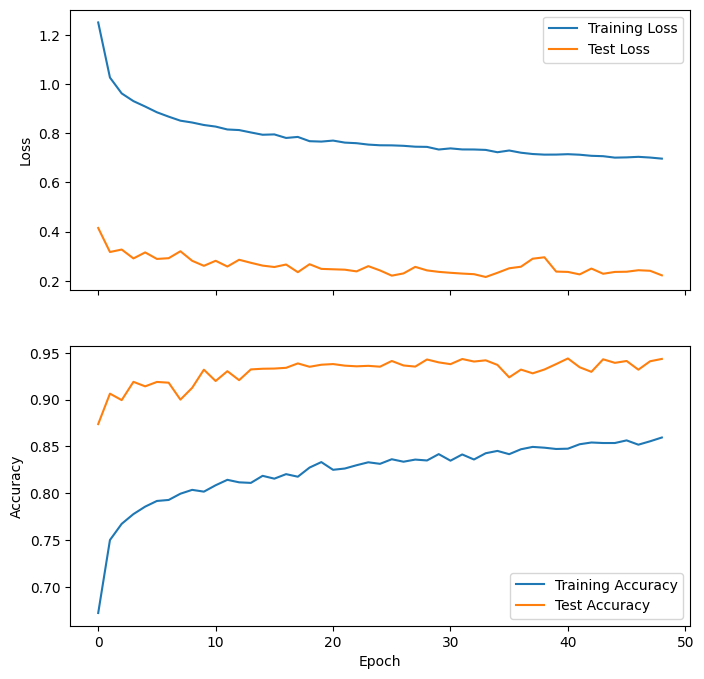

In [12]:
import matplotlib.pyplot as plt

# Create a figure with larger subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))  # Adjust the figsize as needed

# Plot the training and test loss on the first subplot
ax1.plot(batch_tr_info[BATCH_SIZE]["loss"], label="Training Loss")
ax1.plot(batch_te_info[BATCH_SIZE]["loss"], label="Test Loss")
ax1.set_ylabel("Loss")
ax1.legend()

# Plot the training and test accuracy on the second subplot
ax2.plot(batch_tr_info[BATCH_SIZE]["acc"], label="Training Accuracy")
ax2.plot(batch_te_info[BATCH_SIZE]["acc"], label="Test Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

# Show the plot
plt.show()

Best test loss for each batch size with it's corresponding accuracy

In [13]:
for batch_size, info in batch_te_info.items():
    best_test_loss = 100
    best_epoch = 0
    for epoch, loss in enumerate(info["loss"]):
        if best_test_loss > loss:
            best_test_loss = loss
            best_epoch = epoch
    print(f"Batch size {batch_size}: Epoch {best_epoch+1} has {round(best_test_loss, 3)} loss with {round    (info['acc'][best_epoch]*100, 2)}% accuracy")

Batch size 16: Epoch 34 has 0.216 loss with 94.19% accuracy
